# Lab | Revisiting Machine Learning Case Study

## The import of the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## The import of and sneak peek at the data

In [2]:
data = pd.read_csv('/Users/elissadejong/Desktop/learningSet.csv')
data.head()

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0     8901     GRI      0    IL  61081                    3712      0   
1     9401     BOA      1    CA  91326                    5202      0   
2     9001     AMH      1    NC  27017                       0      0   
3     8701     BRY      0    CA  95953                    2801      0   
4     8601              0    FL  33176                    2001      0   

  RECINHSE  ... TARGET_D HPHONE_D RFA_2R RFA_2F RFA_2A MDMAUD_R  MDMAUD_F  \
0           ...      0.0        0      L      4      E        X         X   
1           ...      0.0        0      L      2      G        X         X   
2           ...      0.0        1      L      4      E        X         X   
3           ...      0.0        1      L      4      E        X         X   
4        X  ...      0.0        1      L      2      F        X         X   

  MDMAUD_A CLUSTER2 GEOCODE2  
0        X     39.0        C  
1        X      1.0        A  
2        X     60.0        C  
3        X     41.0        C  
4        X     26.0        A  

[5 rows x 481 columns]

In [3]:
data.shape

(95412, 481)

In [4]:
list(data.columns)

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ET

In [5]:
data[['TARGET_B', 'TARGET_D']]

TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

## Conversion of the headers of the columns to snake_case 

In [6]:
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))

data.columns = cols
data.head()

odatedw osource  tcode state    zip mailcode pvastate   dob noexch  \
0     8901     GRI      0    IL  61081                    3712      0   
1     9401     BOA      1    CA  91326                    5202      0   
2     9001     AMH      1    NC  27017                       0      0   
3     8701     BRY      0    CA  95953                    2801      0   
4     8601              0    FL  33176                    2001      0   

  recinhse  ... target_d hphone_d rfa_2r rfa_2f rfa_2a mdmaud_r  mdmaud_f  \
0           ...      0.0        0      L      4      E        X         X   
1           ...      0.0        0      L      2      G        X         X   
2           ...      0.0        1      L      4      E        X         X   
3           ...      0.0        1      L      4      E        X         X   
4        X  ...      0.0        1      L      2      F        X         X   

  mdmaud_a cluster2 geocode2  
0        X     39.0        C  
1        X      1.0        A  
2        X     60.0        C  
3        X     41.0        C  
4        X     26.0        A  

[5 rows x 481 columns]

## Taking out columns OSOURCE & ZIP CODE

(lab question 2)<br>
The following variables are excluded by looking at the definitions:<br>
OSOURCE - symbol definitions not provided, too many categories<br>
ZIP CODE - we are including state already<br>
These columns are dropped in a new list named 'drop_list'.

In [7]:
drop_list = data[['osource', 'zip']]
drop_list = list(drop_list)
drop_list

['osource', 'zip']

In [8]:
data = data.drop(['osource', 'zip'], axis=1)

## Null Values

(lab question 1)<br>
Checking for null values in all the columns

In [9]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(80)

percentage
rdate_5    99.990567
ramnt_5    99.990567
rdate_3    99.746363
ramnt_3    99.746363
rdate_4    99.705488
...              ...
adate_16   21.343227
adate_14   19.774242
adate_9    11.785729
adate_11   10.923154
timelag    10.452564

[80 rows x 1 columns]

(lab question 3 & 4)<br>
Taking out the columns with more than 85% of null values (data1)

In [10]:
data1 = data.loc[:, data.isnull().sum() < 0.85*data.shape[0]]
data1.shape

(95412, 454)

In [11]:
data_too_many_nulls = data.loc[:, data.isnull().sum() > 0.85*data.shape[0]]

In [12]:
data_too_many_nulls

numchld  rdate_3  rdate_4  rdate_5  rdate_6  rdate_7  rdate_10  \
0          NaN      NaN      NaN      NaN      NaN      NaN    9512.0   
1          1.0      NaN      NaN      NaN      NaN      NaN       NaN   
2          NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3          NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4          1.0      NaN      NaN      NaN      NaN      NaN       NaN   
...        ...      ...      ...      ...      ...      ...       ...   
95407      NaN      NaN      NaN      NaN      NaN   9602.0       NaN   
95408      1.0      NaN      NaN      NaN      NaN   9603.0       NaN   
95409      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
95410      NaN      NaN   9608.0      NaN      NaN      NaN    9512.0   
95411      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

       rdate_13  rdate_15  rdate_17  ...  ramnt_5  ramnt_6  ramnt_7  ramnt_10  \
0           NaN    9505.0    9503.0  ...      NaN      NaN      NaN      10.0   
1           NaN       NaN       NaN  ...      NaN      NaN      NaN       NaN   
2           NaN       NaN       NaN  ...      NaN      NaN      NaN       NaN   
3           NaN       NaN    9503.0  ...      NaN      NaN      NaN       NaN   
4           NaN       NaN       NaN  ...      NaN      NaN      NaN       NaN   
...         ...       ...       ...  ...      ...      ...      ...       ...   
95407       NaN       NaN       NaN  ...      NaN      NaN     25.0       NaN   
95408       NaN       NaN       NaN  ...      NaN      NaN     20.0       NaN   
95409       NaN       NaN       NaN  ...      NaN      NaN      NaN       NaN   
95410    9508.0    9507.0       NaN  ...      NaN      NaN      NaN      18.0   
95411       NaN       NaN       NaN  ...      NaN      NaN      NaN       NaN   

       ramnt_13  ramnt_15  ramnt_17  ramnt_20  ramnt_21  ramnt_23  
0           NaN      11.0      11.0       NaN       NaN      11.0  
1           NaN       NaN       NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN       NaN       7.0  
3           NaN       NaN      11.0       6.0      11.0       NaN  
4           NaN       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...  
95407       NaN       NaN       NaN       NaN       NaN       NaN  
95408       NaN       NaN       NaN       NaN       NaN       NaN  
95409       NaN       NaN       NaN       NaN       NaN       NaN  
95410      20.0      18.0       NaN       NaN      15.0       NaN  
95411       NaN       NaN       NaN       NaN       NaN     125.0  

[95412 rows x 25 columns]

In [13]:
data_too_many_nulls = list(data_too_many_nulls)

In [14]:
data_too_many_nulls

['numchld',
 'rdate_3',
 'rdate_4',
 'rdate_5',
 'rdate_6',
 'rdate_7',
 'rdate_10',
 'rdate_13',
 'rdate_15',
 'rdate_17',
 'rdate_20',
 'rdate_21',
 'rdate_23',
 'ramnt_3',
 'ramnt_4',
 'ramnt_5',
 'ramnt_6',
 'ramnt_7',
 'ramnt_10',
 'ramnt_13',
 'ramnt_15',
 'ramnt_17',
 'ramnt_20',
 'ramnt_21',
 'ramnt_23']

## Split of the data (data1) into numerical & categorical dataframes

In [15]:
numerical = pd.DataFrame(data1.select_dtypes(np.number))
numerical.describe()

odatedw         tcode           dob           age        income  \
count  95412.000000  95412.000000  95412.000000  71747.000000  74126.000000   
mean    9141.363256     54.223117   2723.602933     61.611649      3.886248   
std      343.454752    953.844476   2132.241295     16.664199      1.854960   
min     8306.000000      0.000000      0.000000      1.000000      1.000000   
25%     8801.000000      0.000000    201.000000     48.000000      2.000000   
50%     9201.000000      1.000000   2610.000000     62.000000      4.000000   
75%     9501.000000      2.000000   4601.000000     75.000000      5.000000   
max     9701.000000  72002.000000   9710.000000     98.000000      7.000000   

            wealth1           hit       mbcraft      mbgarden       mbbooks  \
count  50680.000000  95412.000000  42558.000000  42558.000000  42558.000000   
mean       5.345699      3.321438      0.152075      0.059166      1.116382   
std        2.742490      9.306899      0.470023      0.262078      1.669967   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      0.000000      0.000000      0.000000      0.000000   
50%        6.000000      0.000000      0.000000      0.000000      0.000000   
75%        8.000000      3.000000      0.000000      0.000000      2.000000   
max        9.000000    241.000000      6.000000      4.000000      9.000000   

       ...      fistdate      nextdate       timelag       avggift  \
count  ...  95412.000000  85439.000000  85439.000000  95412.000000   
mean   ...   9135.651648   9151.022917      8.093739     13.347786   
std    ...    320.394019    294.257260      8.213242     10.769997   
min    ...      0.000000   7211.000000      0.000000      1.285714   
25%    ...   8810.000000   8903.000000      4.000000      8.384615   
50%    ...   9201.000000   9204.000000      6.000000     11.636364   
75%    ...   9409.000000   9409.000000     11.000000     15.477955   
max    ...   9603.000000   9702.000000   1088.000000   1000.000000   

            controln      target_b      target_d      hphone_d        rfa_2f  \
count   95412.000000  95412.000000  95412.000000  95412.000000  95412.000000   
mean    95778.176959      0.050759      0.793073      0.500618      1.910053   
std     55284.596094      0.219506      4.429725      0.500002      1.072749   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%     47910.750000      0.000000      0.000000      0.000000      1.000000   
50%     95681.500000      0.000000      0.000000      1.000000      2.000000   
75%    143643.500000      0.000000      0.000000      1.000000      3.000000   
max    191779.000000      1.000000    200.000000      1.000000      4.000000   

           cluster2  
count  95280.000000  
mean      31.533711  
std       18.764614  
min        1.000000  
25%       15.000000  
50%       32.000000  
75%       49.000000  
max       62.000000  

[8 rows x 382 columns]

In [16]:
categorical = pd.DataFrame(data.select_dtypes(np.object))
categorical.describe()

state mailcode pvastate noexch recinhse  recp3 recpgvg recsweep  \
count   95412    95412    95412  95412    95412  95412   95412    95412   
unique     57        2        3      6        2      2       2        2   
top        CA                        0                                    
freq    17343    94013    93954  61203    88709  93395   95298    93795   

       mdmaud domain  ... rfa_21 rfa_22 rfa_23 rfa_24 rfa_2r rfa_2a mdmaud_r  \
count   95412  95412  ...  95412  95412  95412  95412  95412  95412    95412   
unique     28     17  ...    102    117     87     97      1      4        5   
top      XXXX     R2  ...                                  L      F        X   
freq    95118  13623  ...  35212  25648  56274  36973  95412  46964    95118   

       mdmaud_f mdmaud_a geocode2  
count     95412    95412    95280  
unique        4        5        5  
top           X        X        A  
freq      95118    95118    34484  

[4 rows x 72 columns]

## Cleaning the column 'gender'

(lab question 5)<br>
The number of categories in the column GENDER are reduced: The column should only have either "M" for males, "F" for females, and "other" for all the rest.<br>
Note that there are a few null values in the column. Prior to reducing the categories, those null values are replaced using the following code:<br>
<br>
print(categorical['gender'].value_counts())<br>
categorical['gender'] = categorical['gender'].fillna('F')

In [17]:
print(categorical['gender'].value_counts())
categorical['gender'] = categorical['gender'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64


In [18]:
for i in categorical['gender']:
    if ' ' in i:
        categorical['gender'] = categorical['gender'].str.replace(' ', 'F')
    elif 'U' in i:
        categorical['gender'] = categorical['gender'].str.replace('U', 'other')
    elif 'J' in i:
        categorical['gender'] = categorical['gender'].str.replace('J', 'other')
    elif 'A' in i:
        categorical['gender'] = categorical['gender'].str.replace('A', 'other')
    elif 'C' in i:
        categorical['gender'] = categorical['gender'].str.replace('C', 'other')
        

In [19]:
print(categorical['gender'].value_counts())

F        54234
M        39094
other     2084
Name: gender, dtype: int64


## Feature selection

## Numerical variables

### Visualization of the numerical variables using distplot

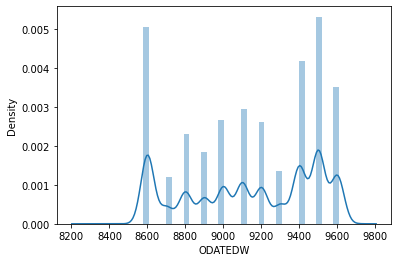

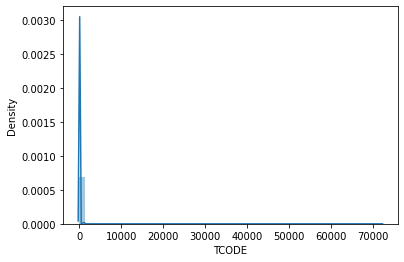

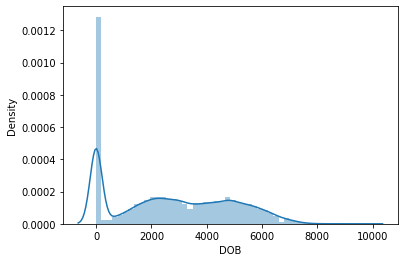

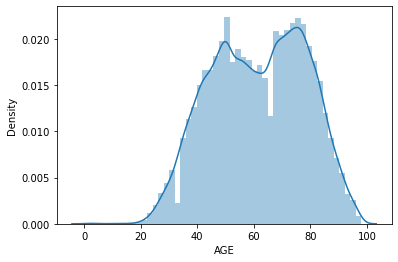

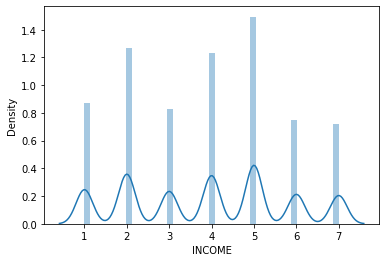

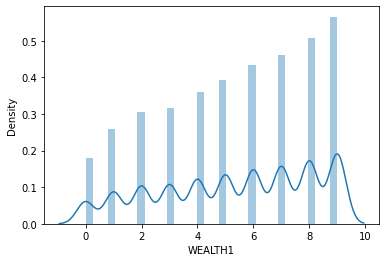

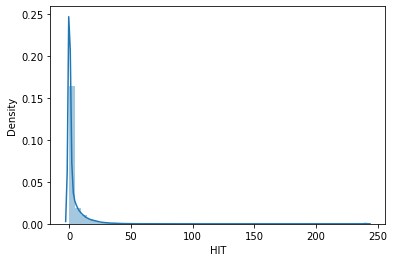

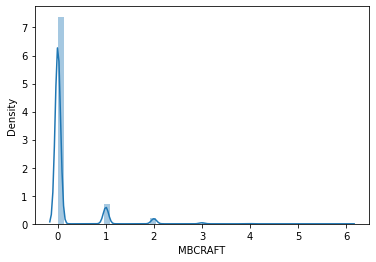

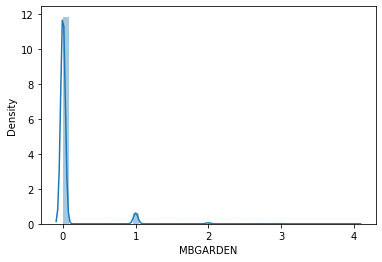

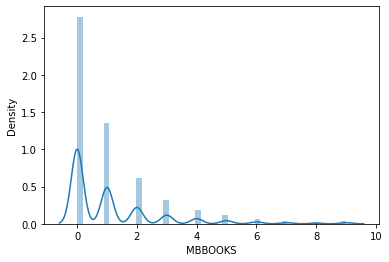

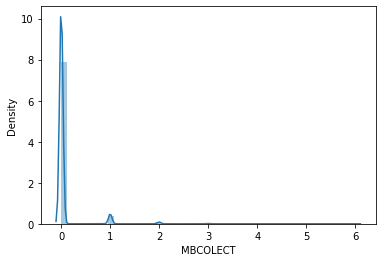

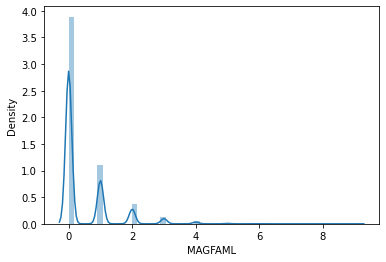

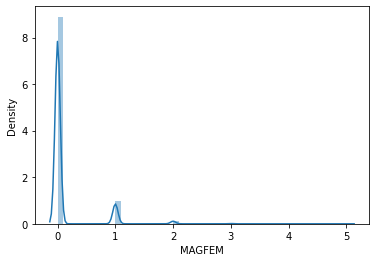

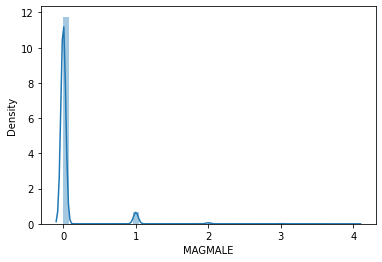

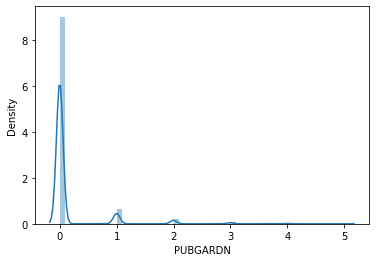

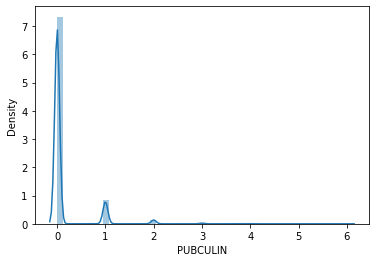

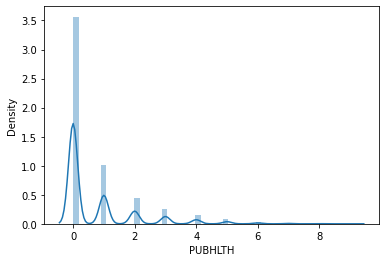

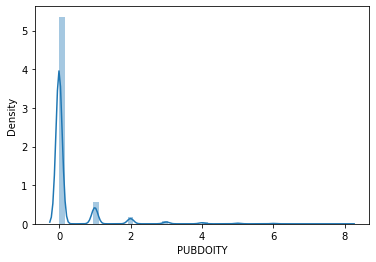

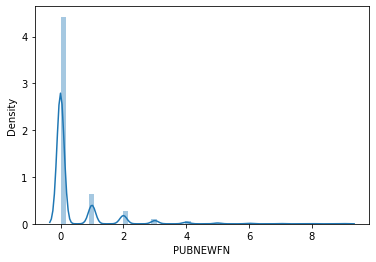

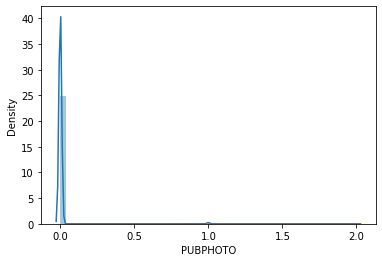

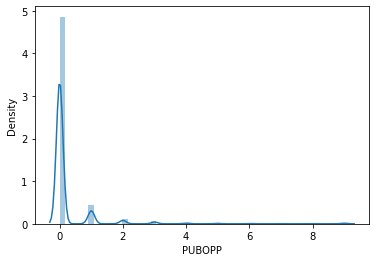

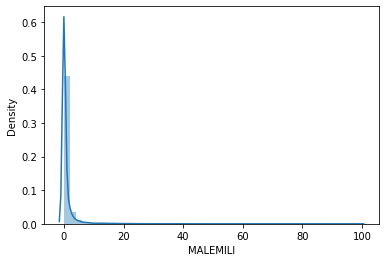

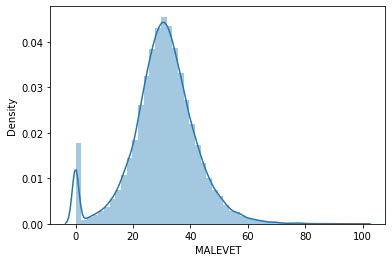

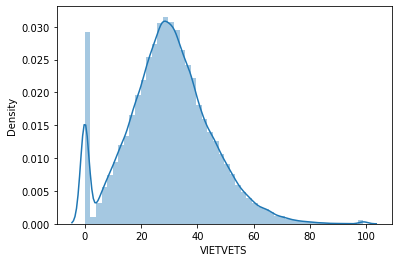

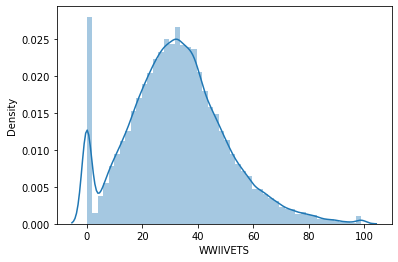

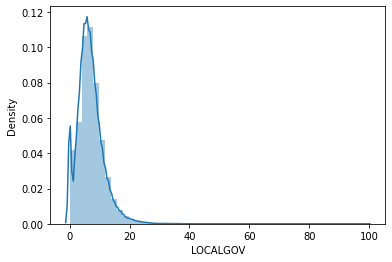

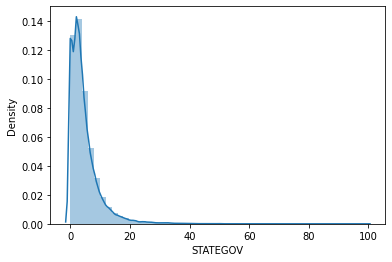

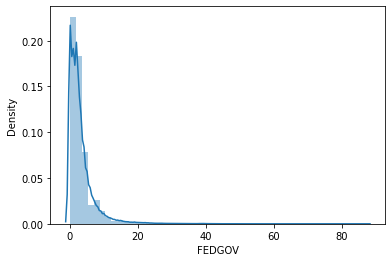

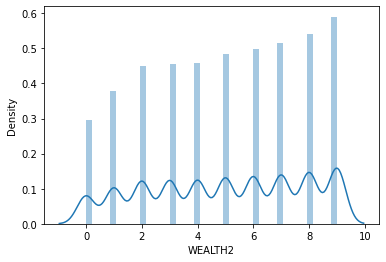

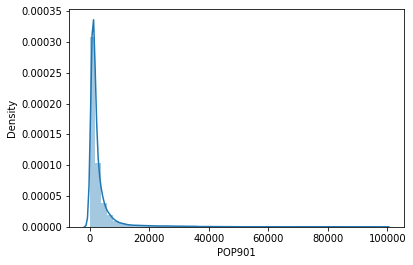

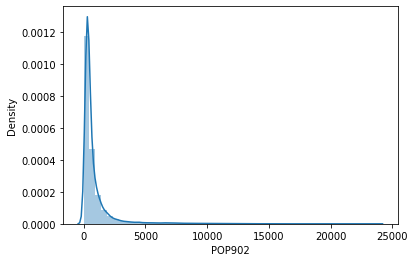

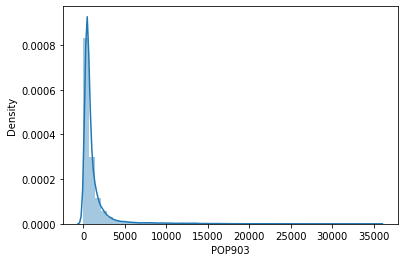

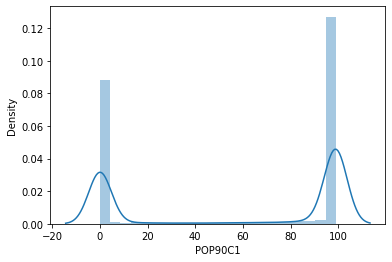

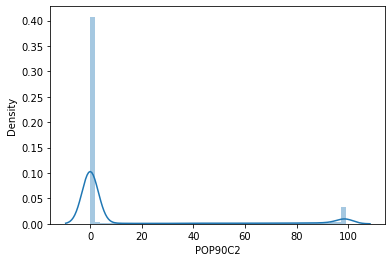

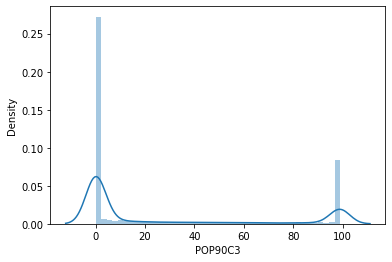

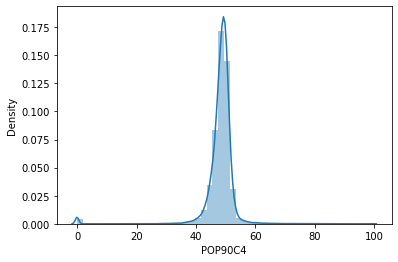

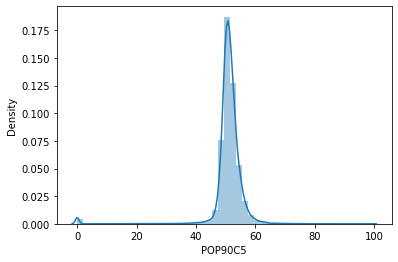

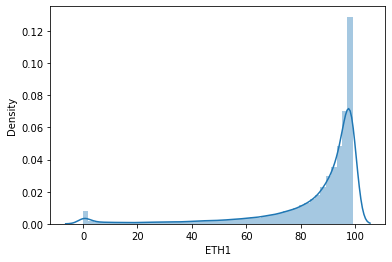

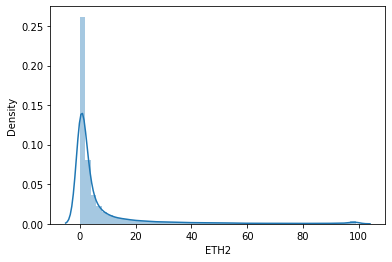

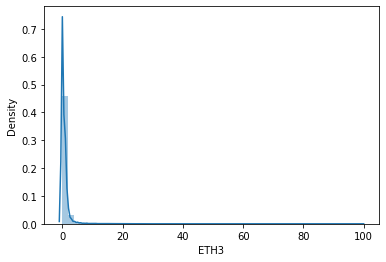

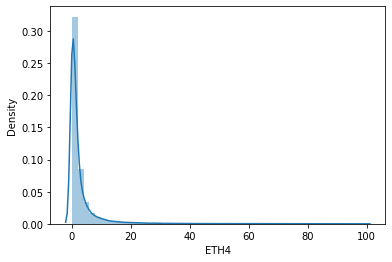

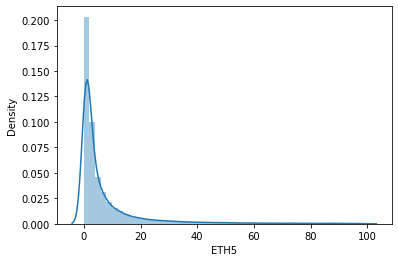

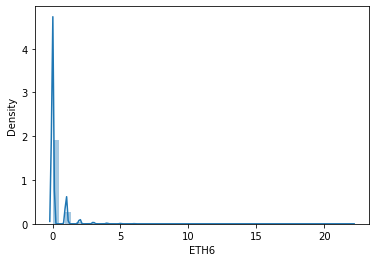

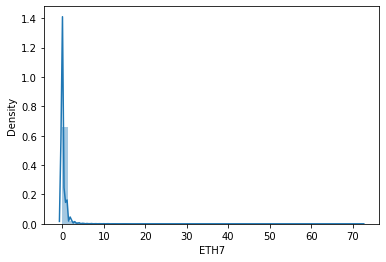

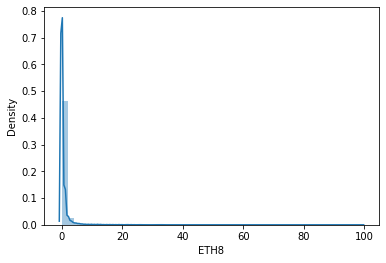

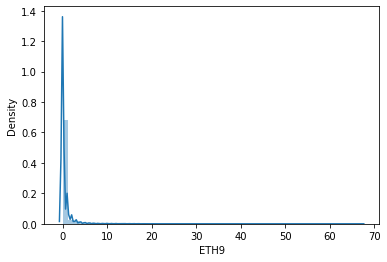

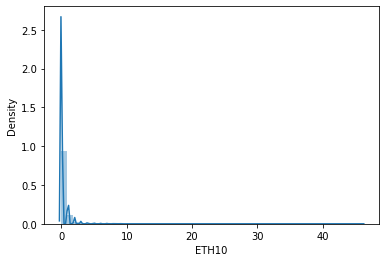

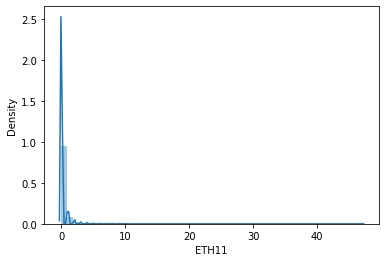

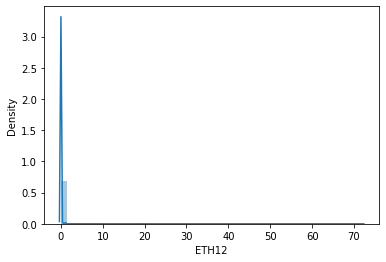

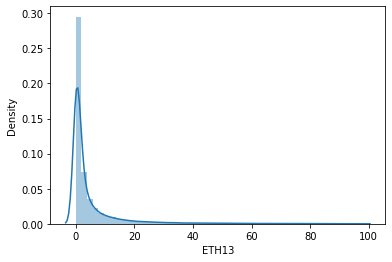

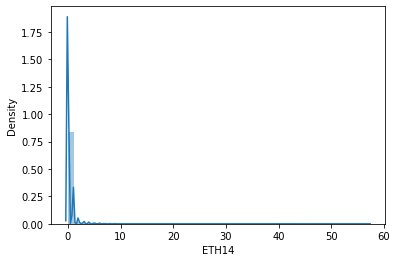

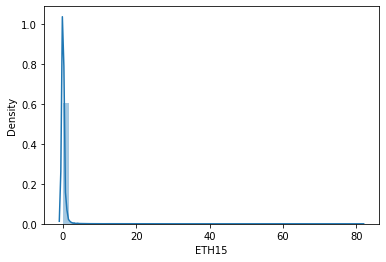

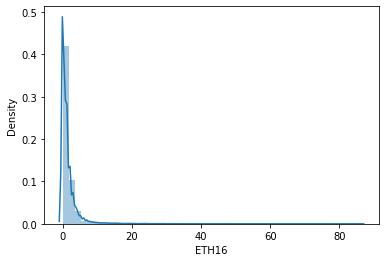

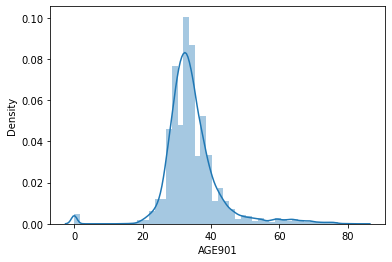

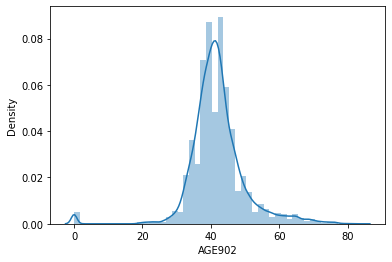

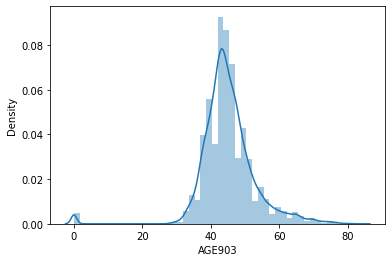

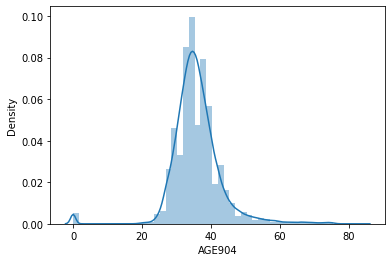

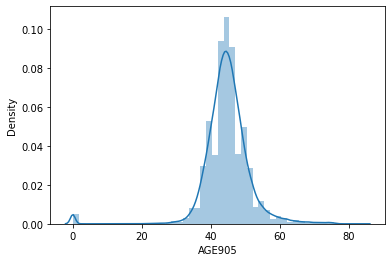

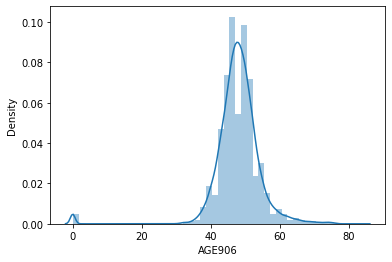

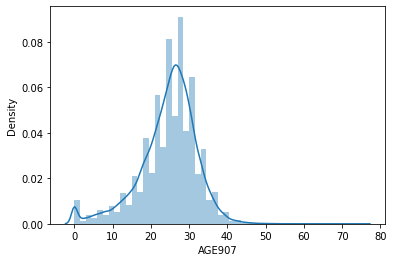

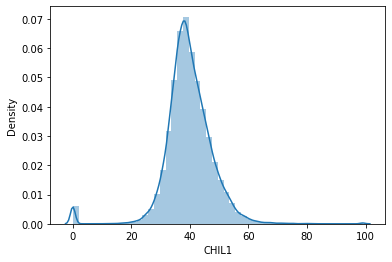

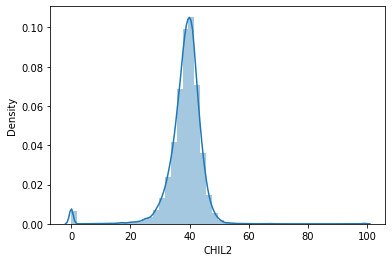

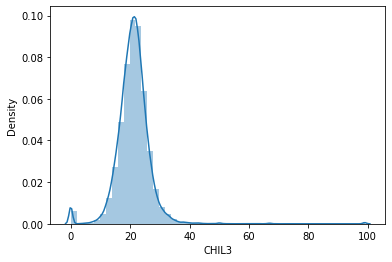

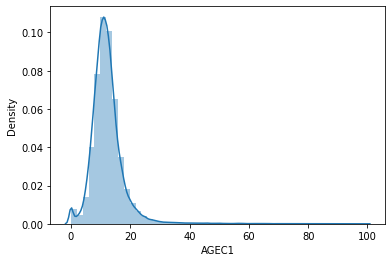

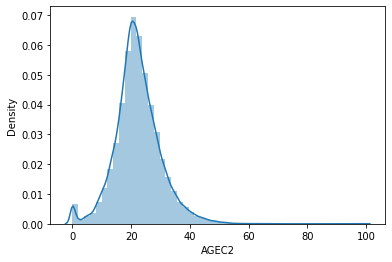

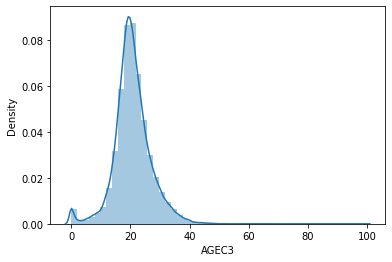

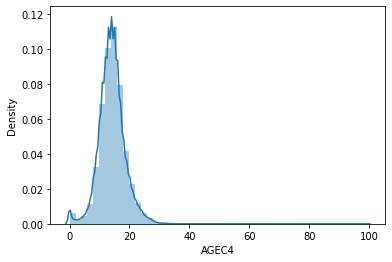

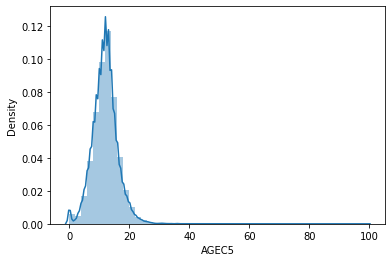

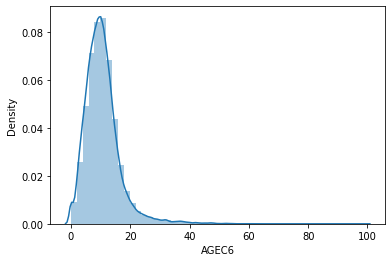

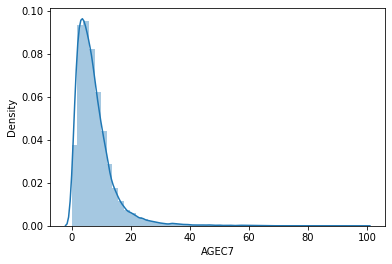

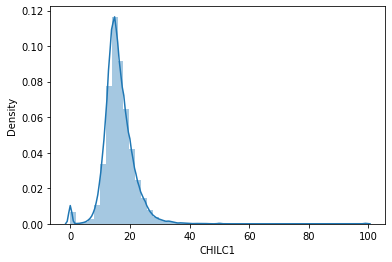

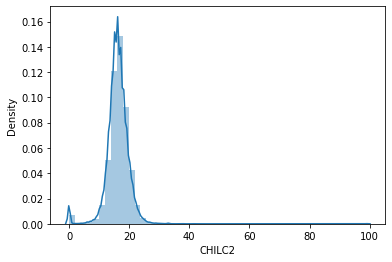

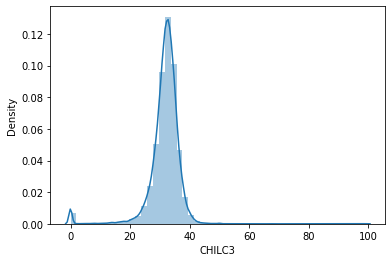

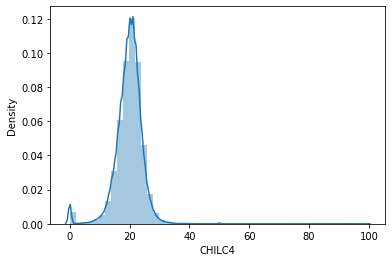

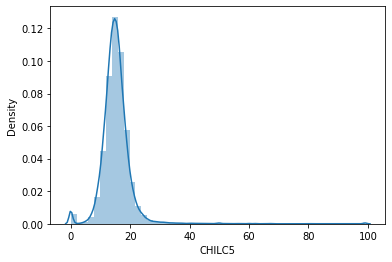

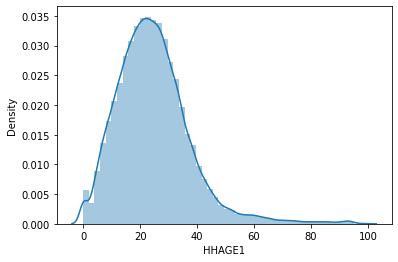

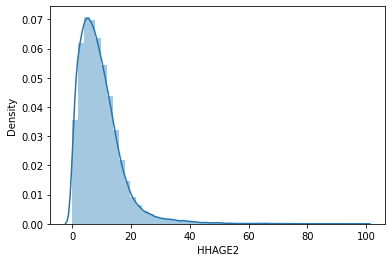

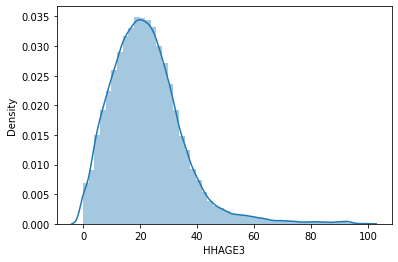

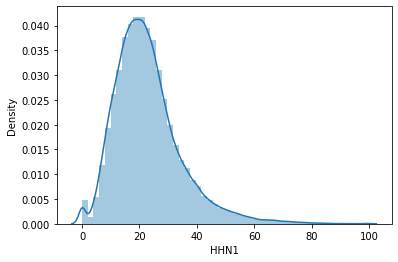

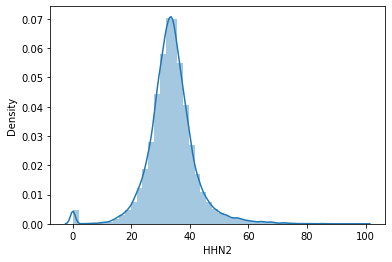

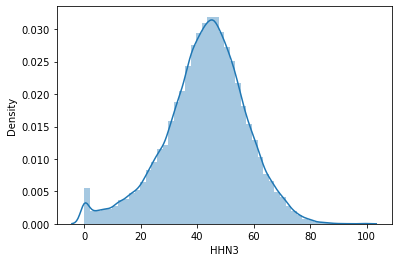

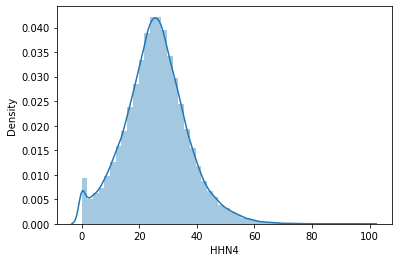

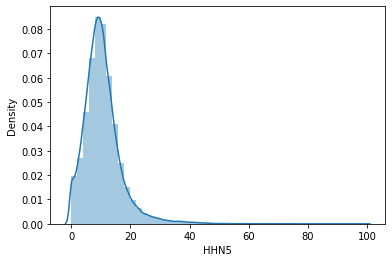

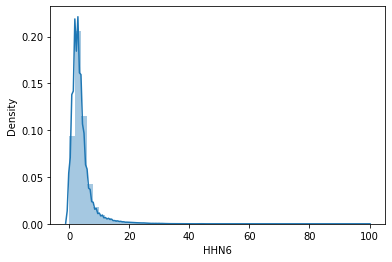

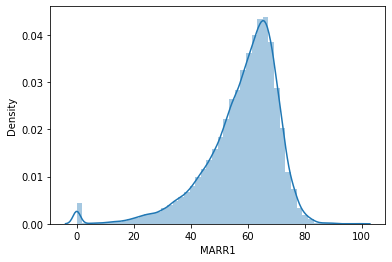

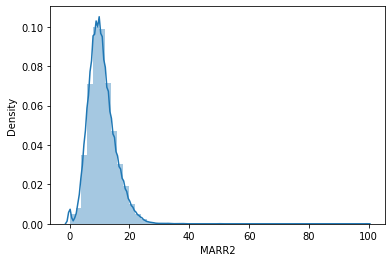

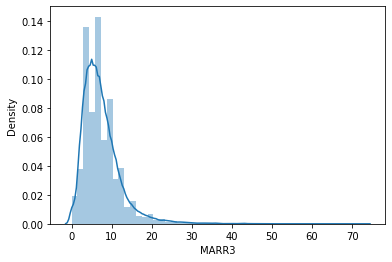

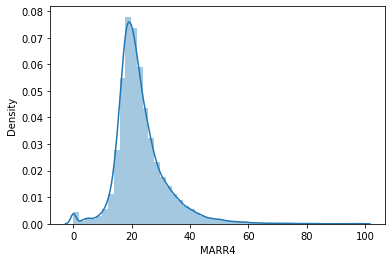

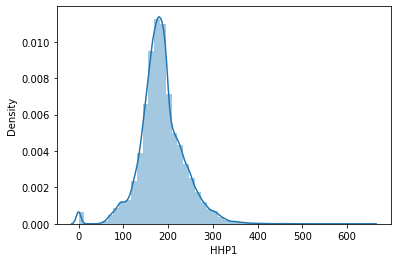

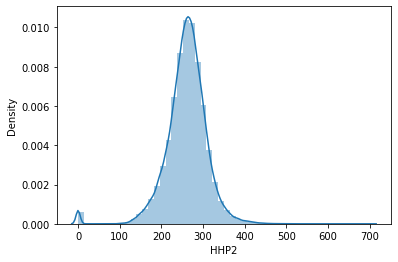

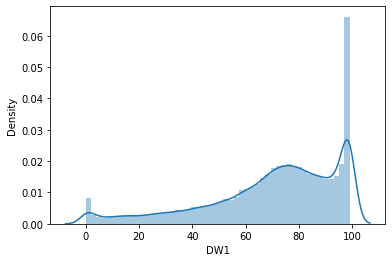

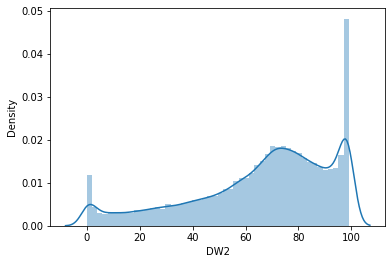

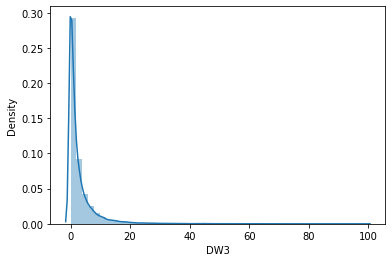

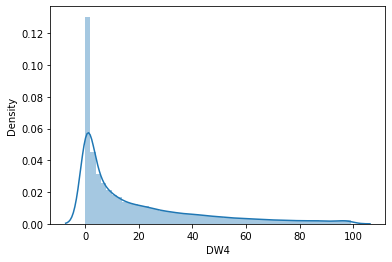

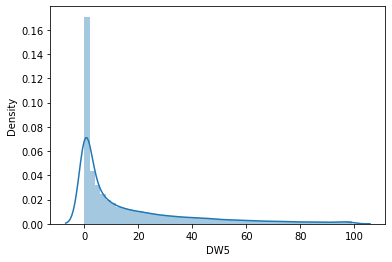

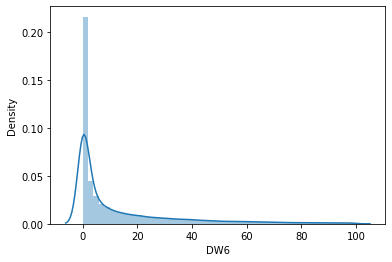

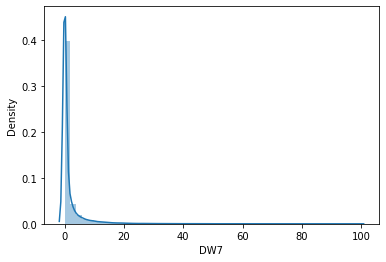

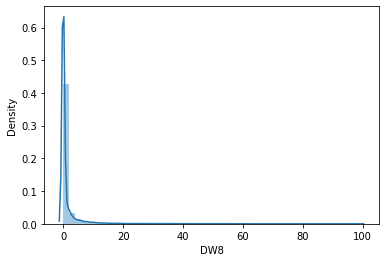

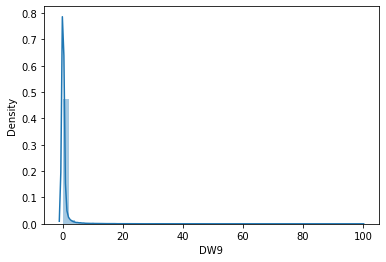

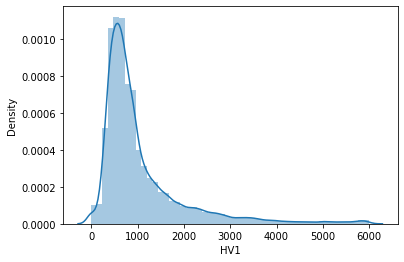

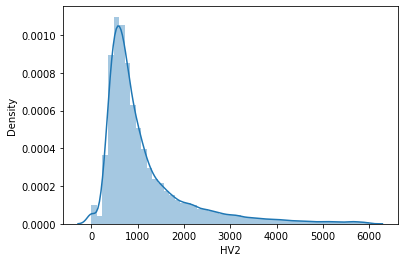

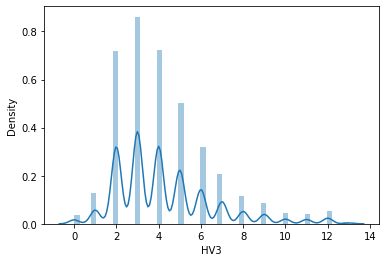

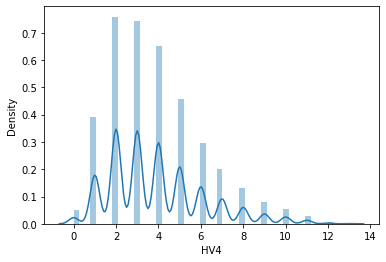

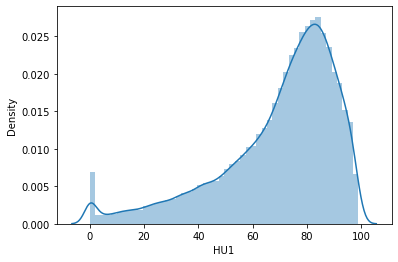

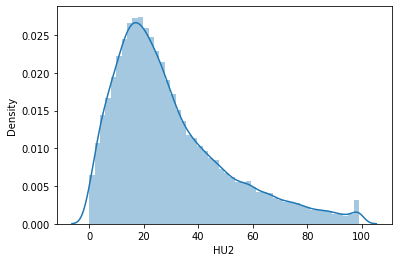

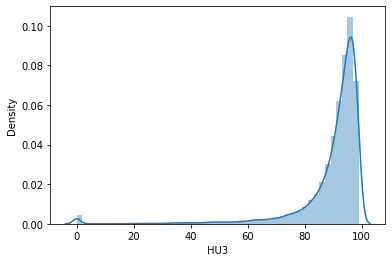

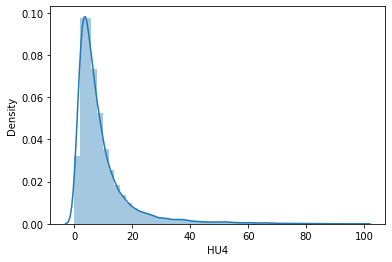

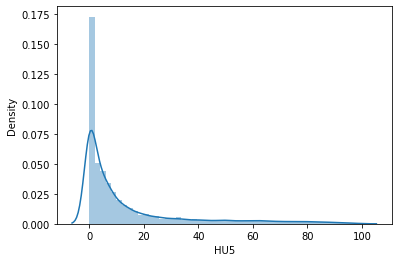

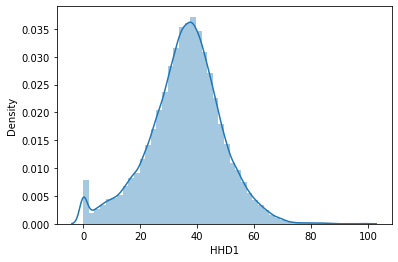

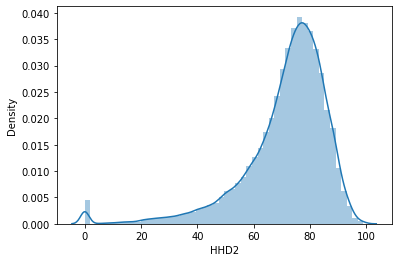

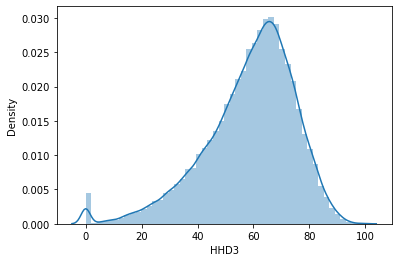

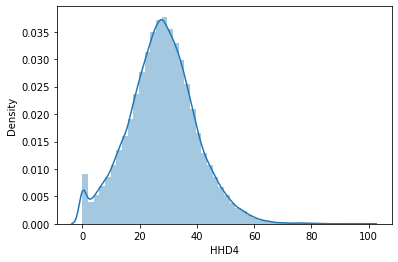

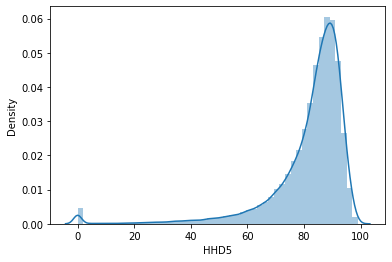

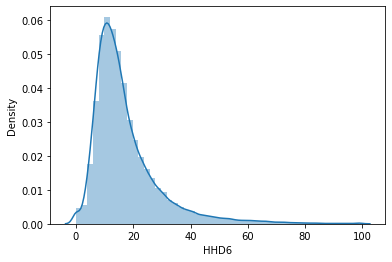

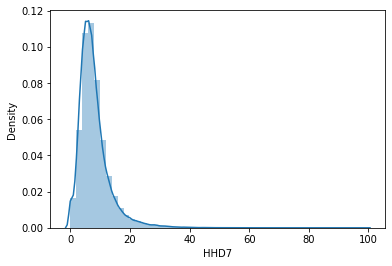

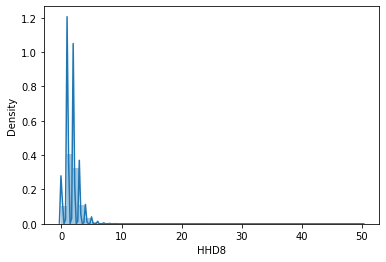

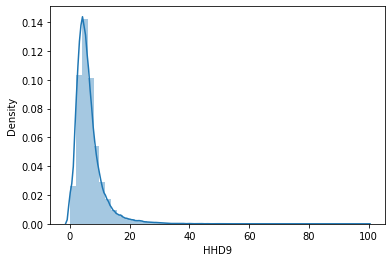

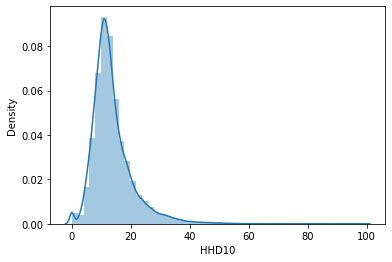

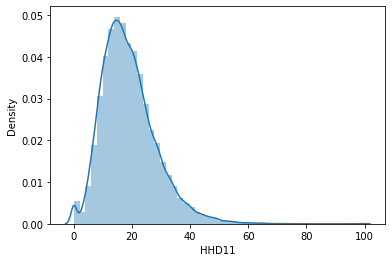

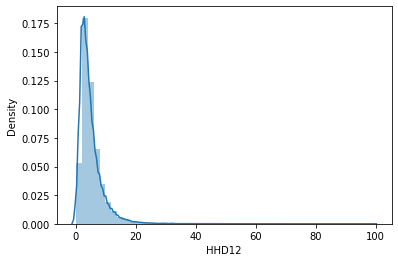

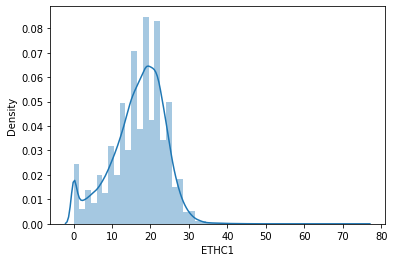

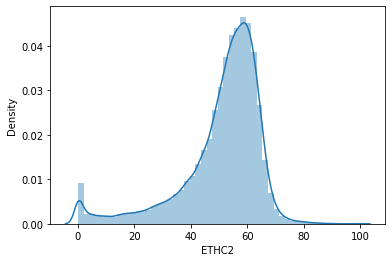

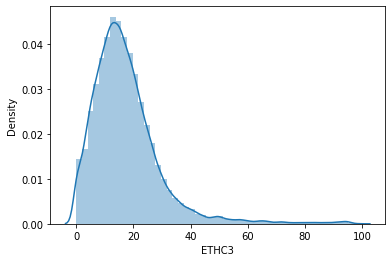

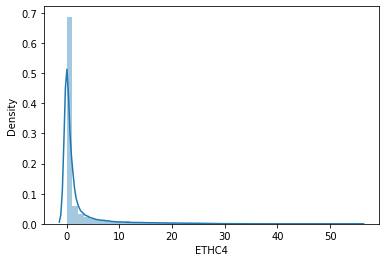

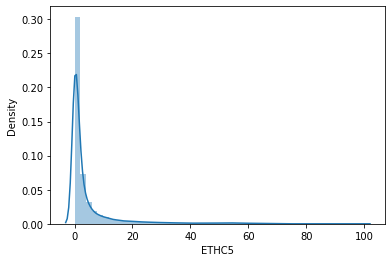

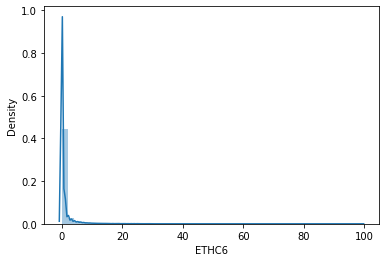

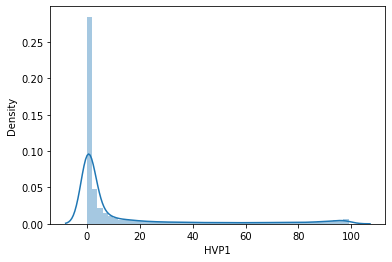

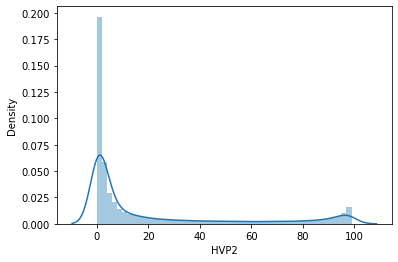

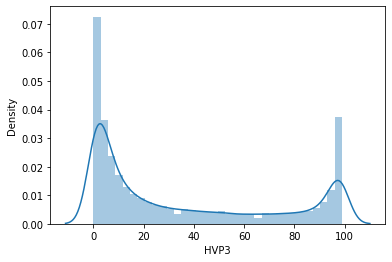

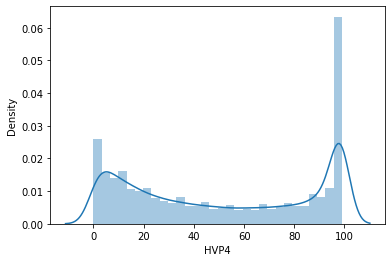

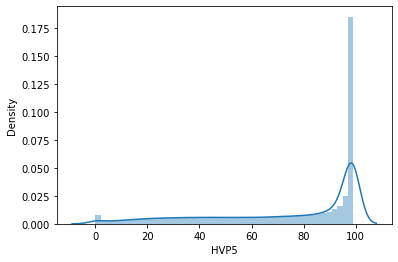

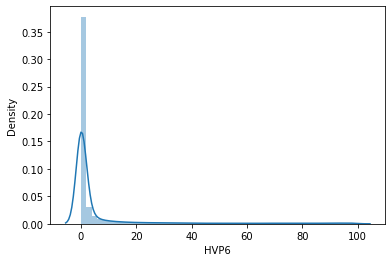

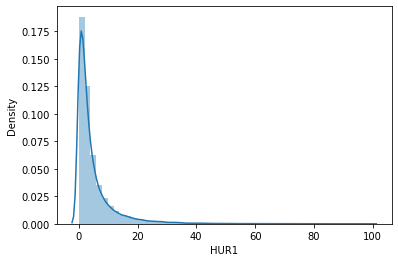

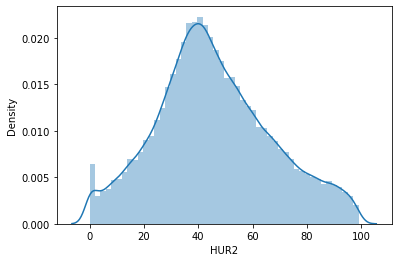

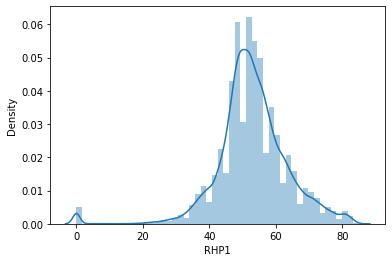

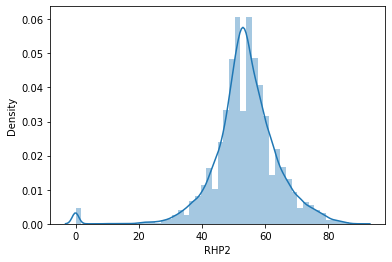

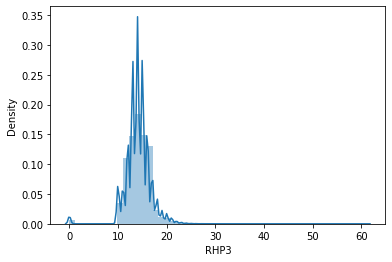

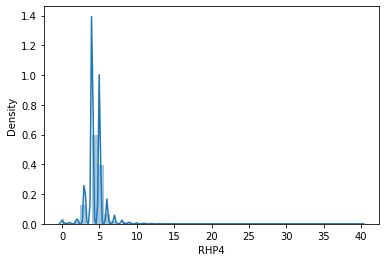

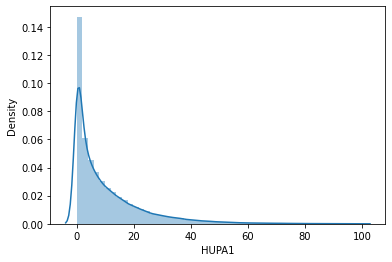

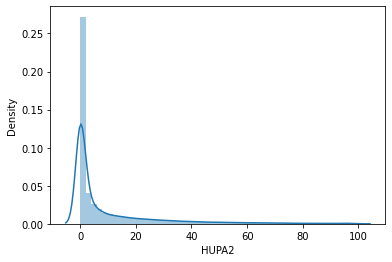

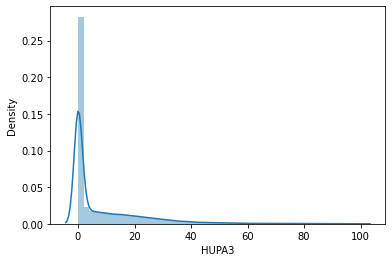

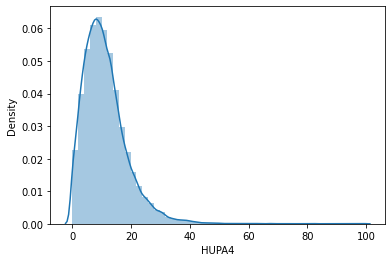

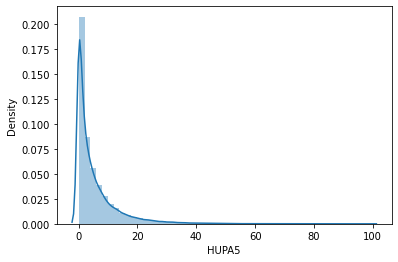

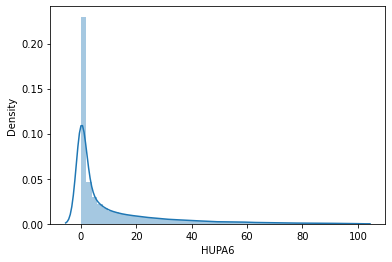

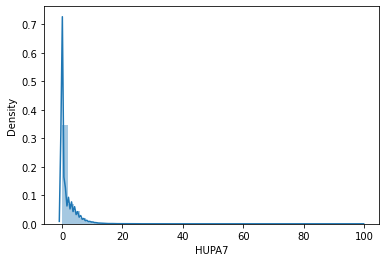

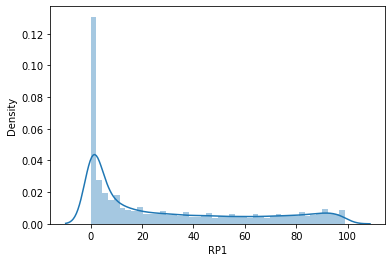

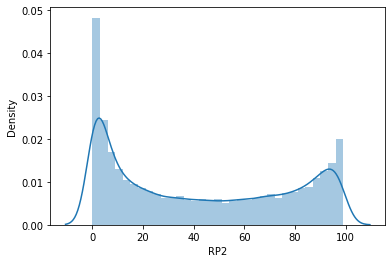

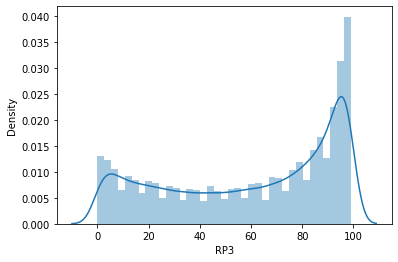

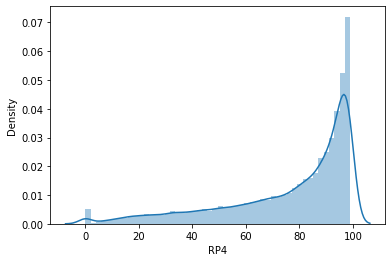

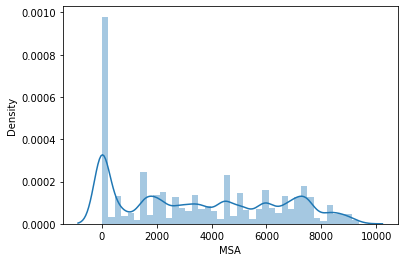

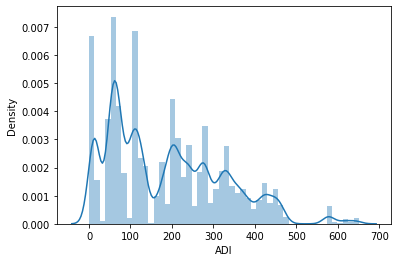

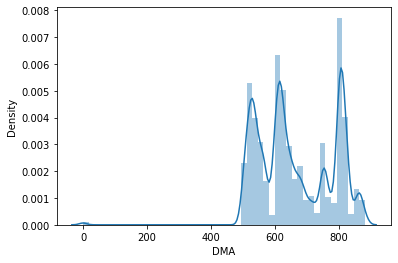

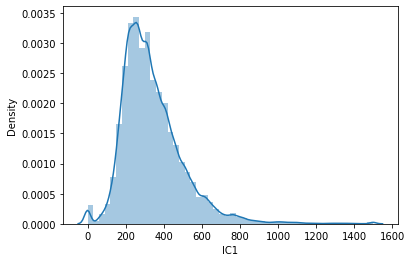

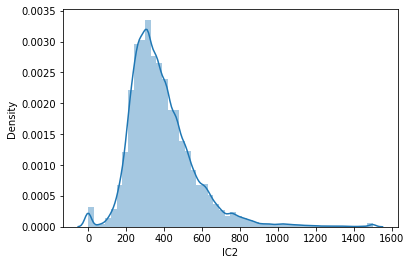

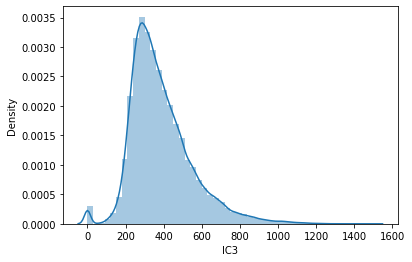

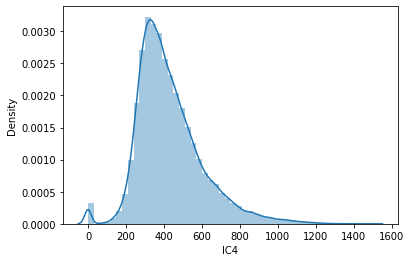

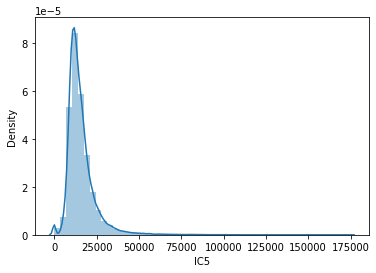

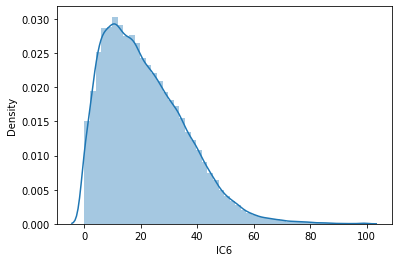

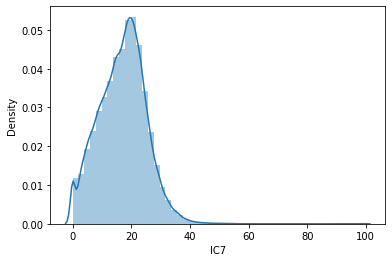

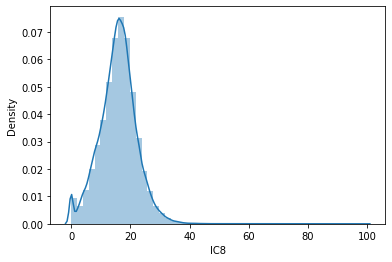

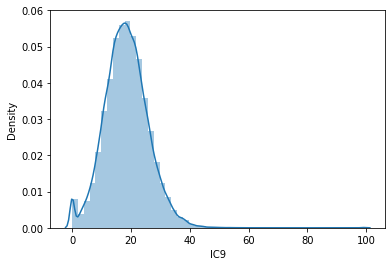

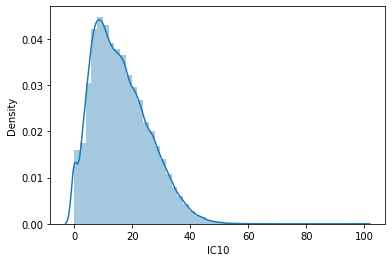

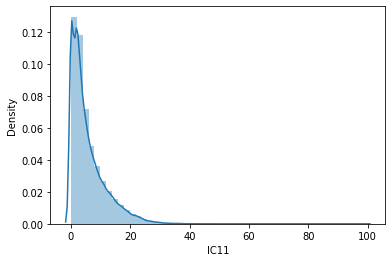

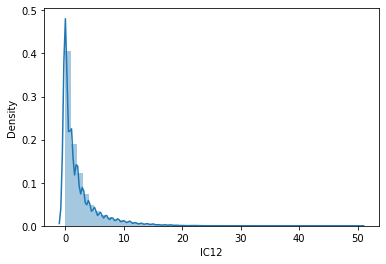

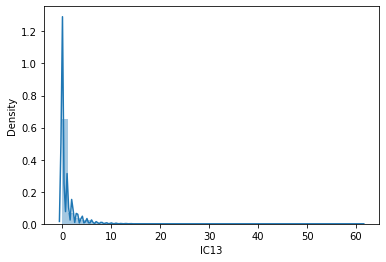

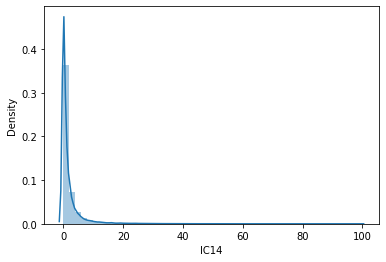

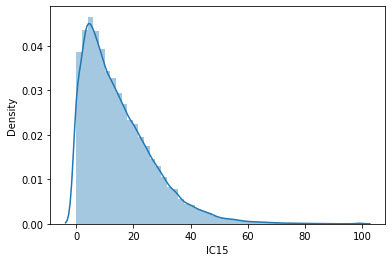

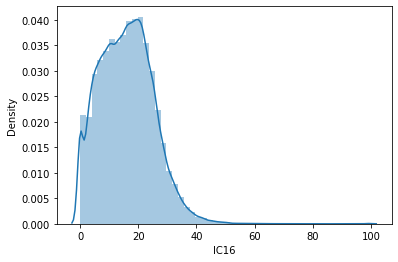

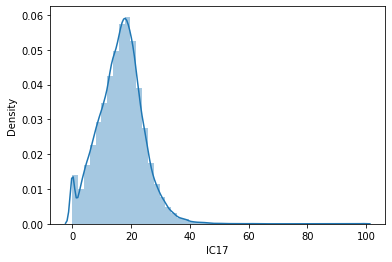

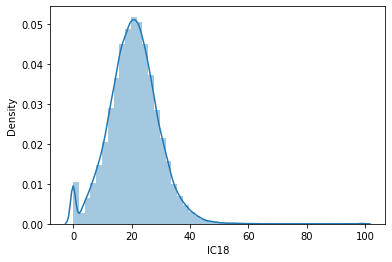

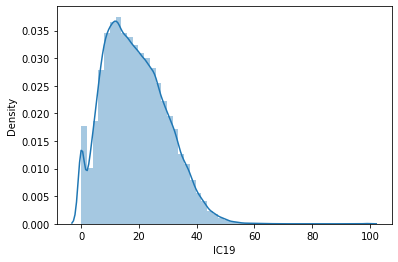

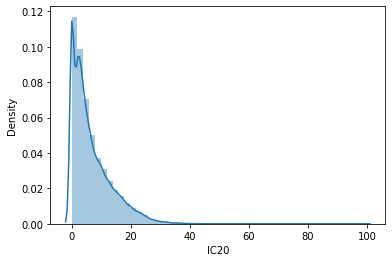

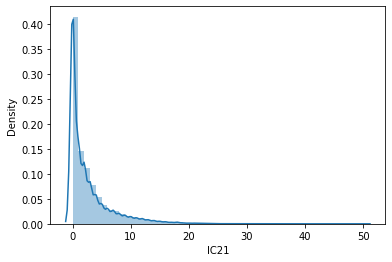

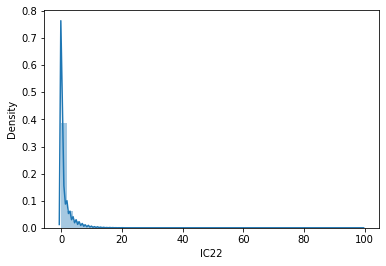

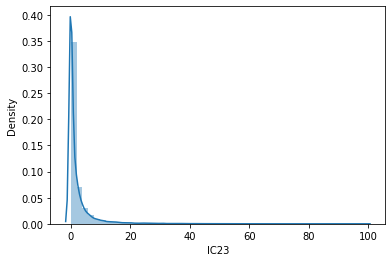

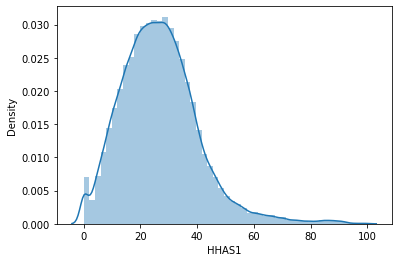

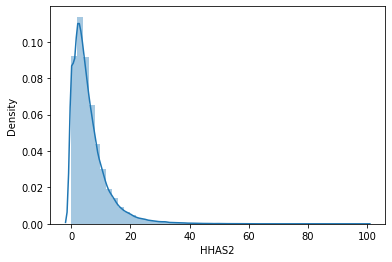

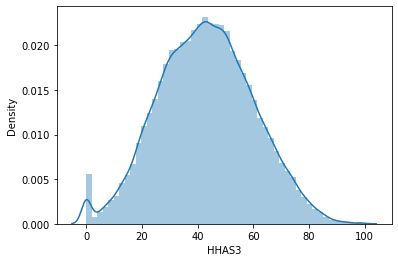

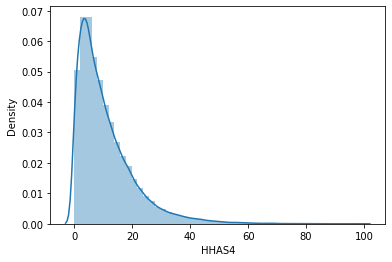

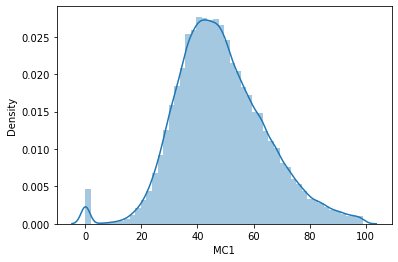

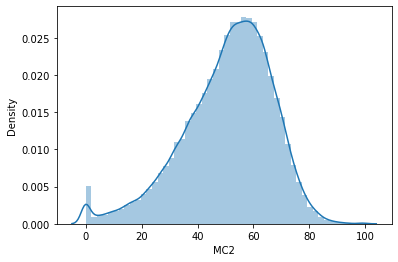

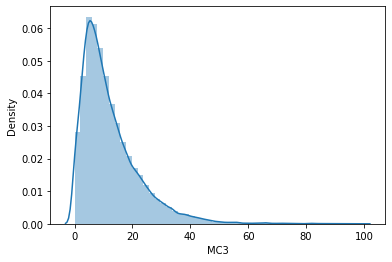

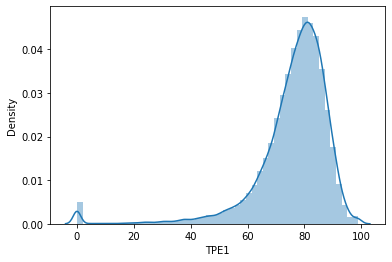

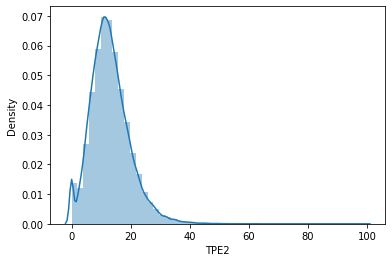

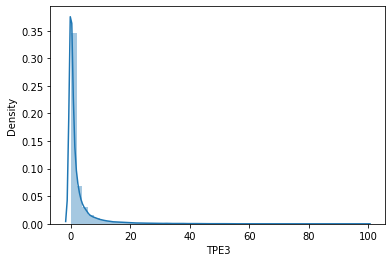

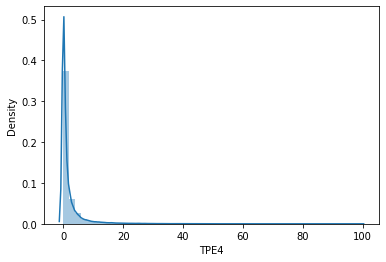

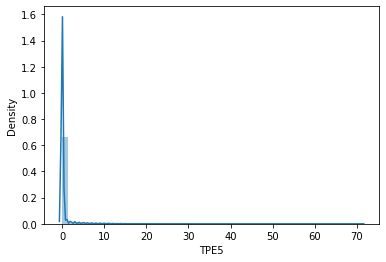

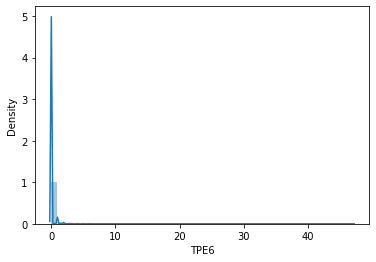

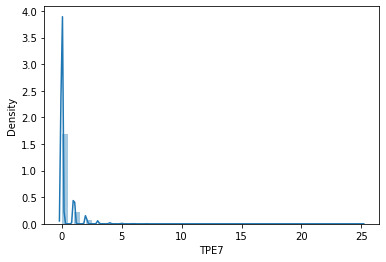

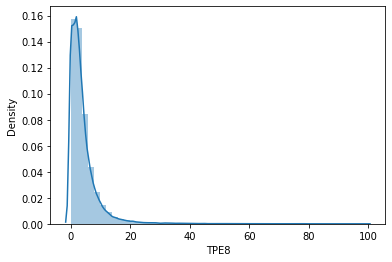

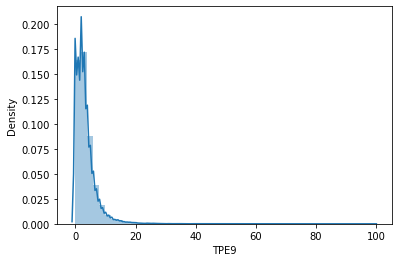

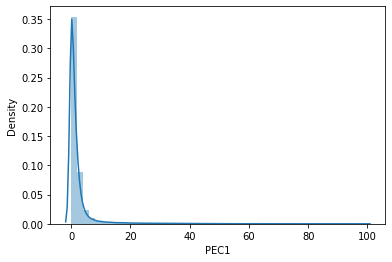

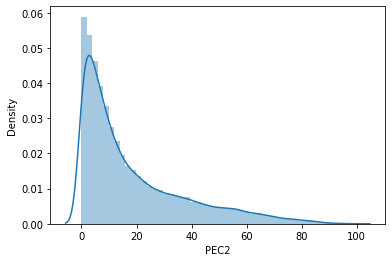

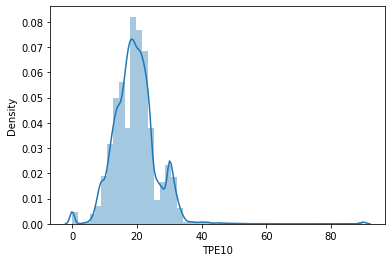

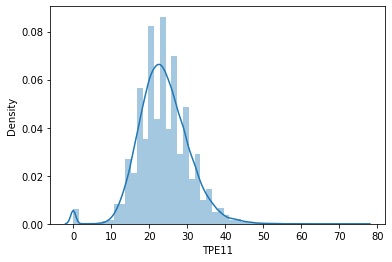

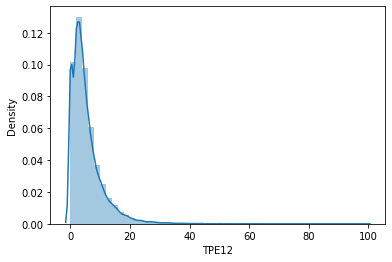

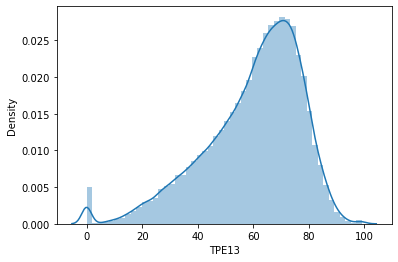

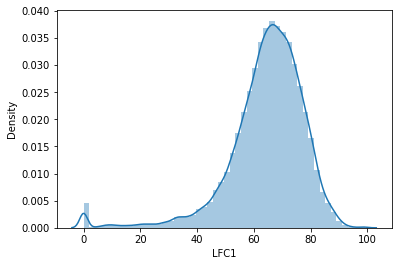

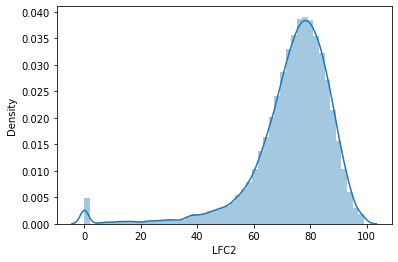

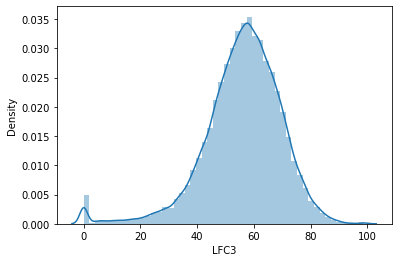

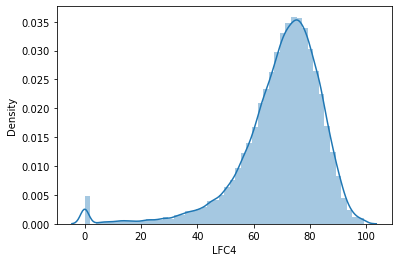

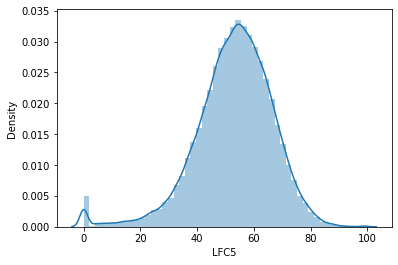

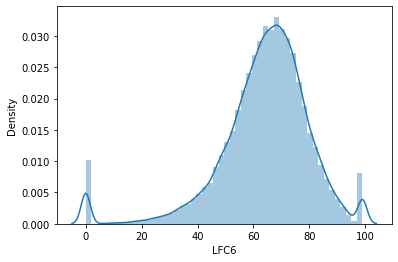

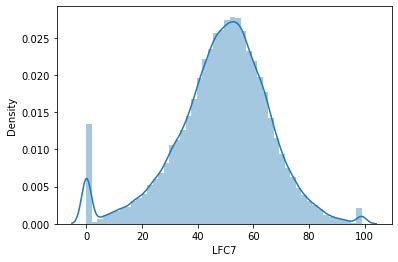

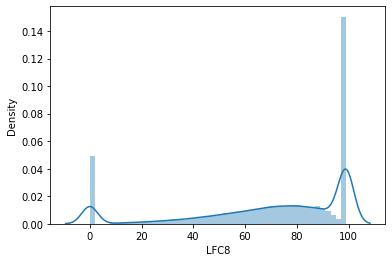

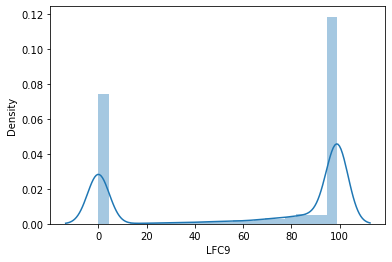

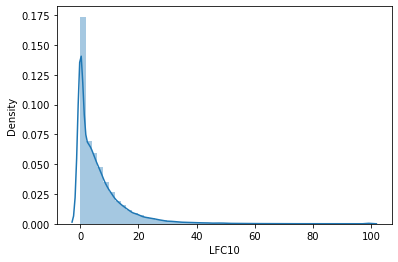

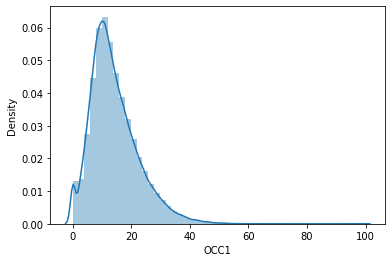

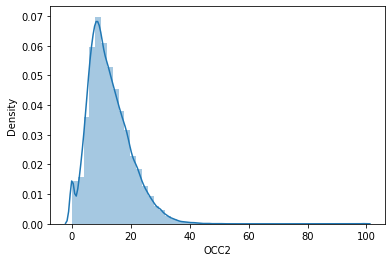

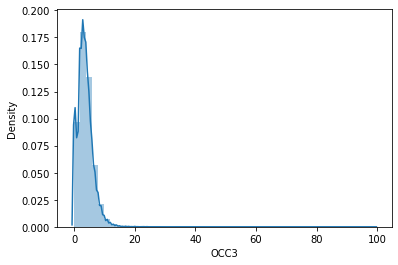

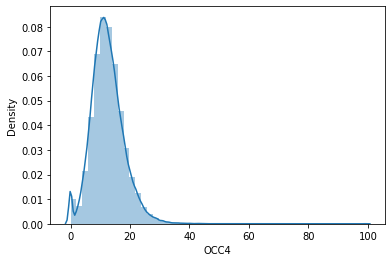

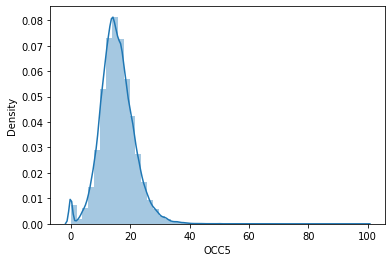

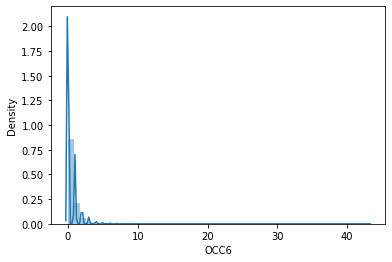

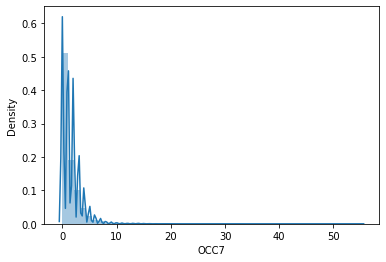

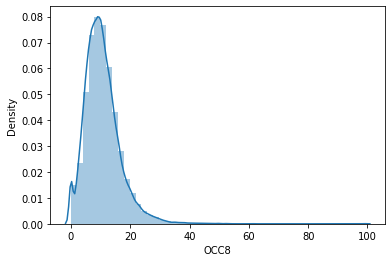

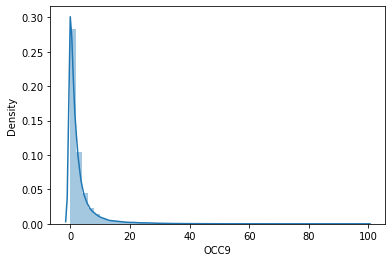

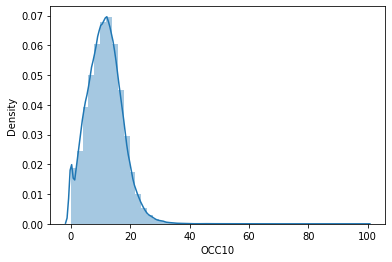

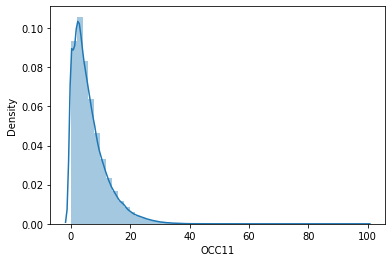

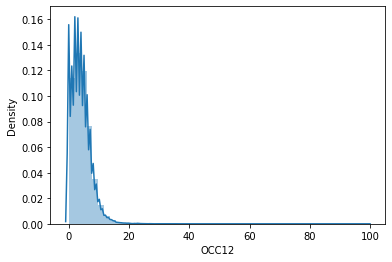

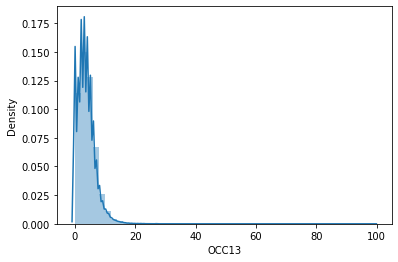

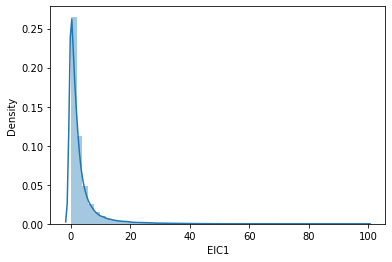

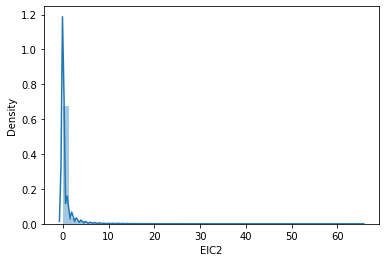

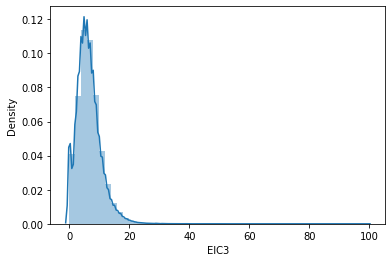

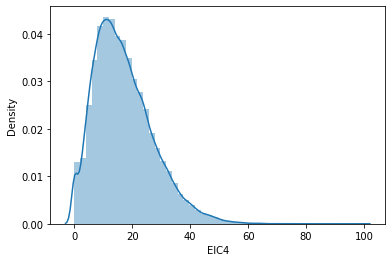

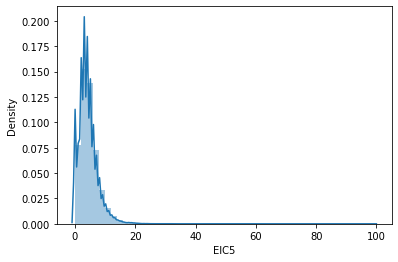

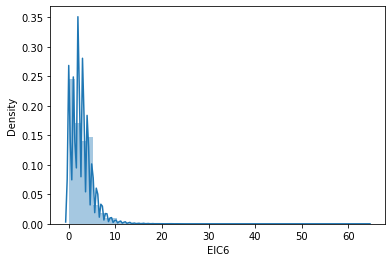

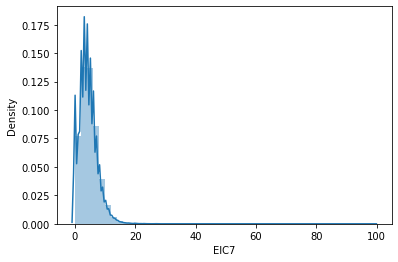

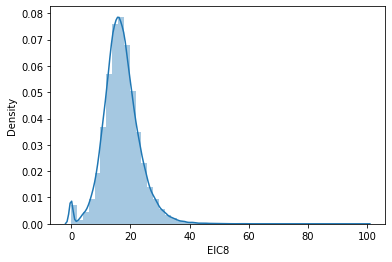

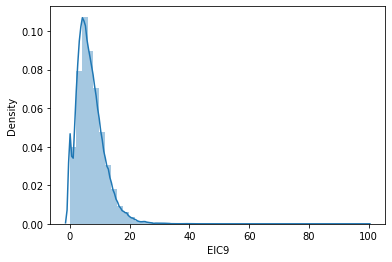

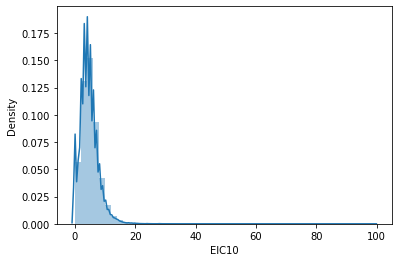

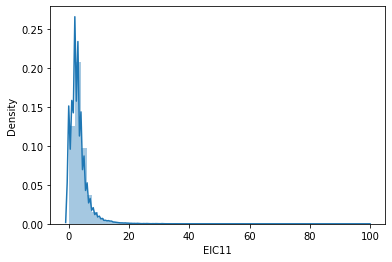

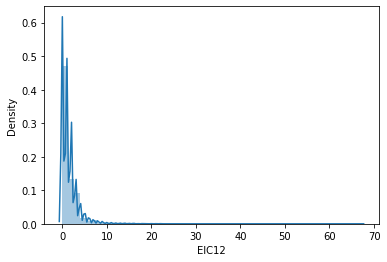

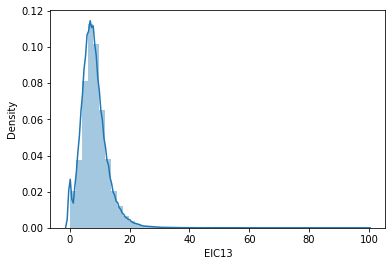

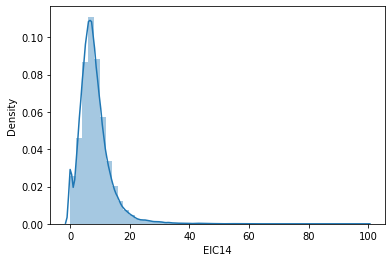

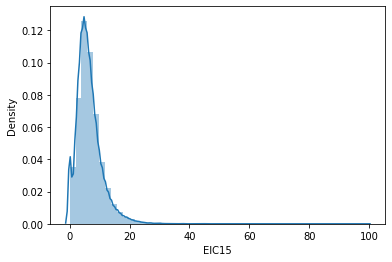

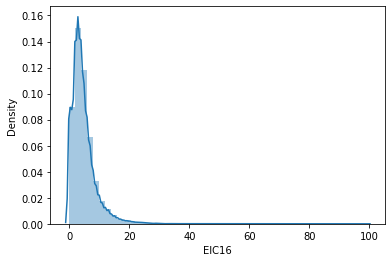

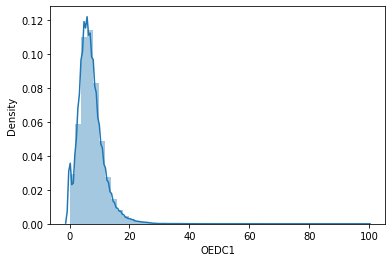

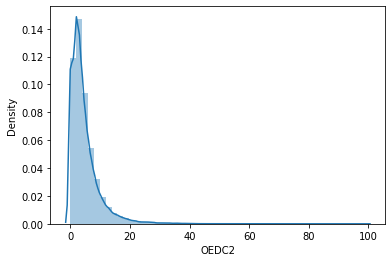

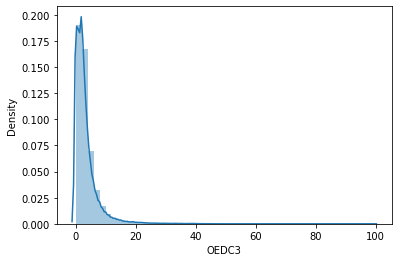

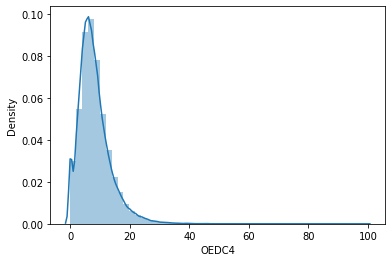

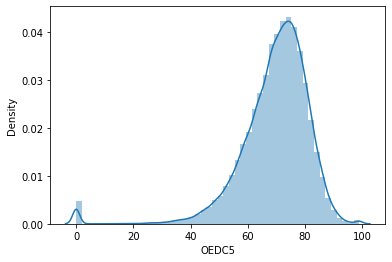

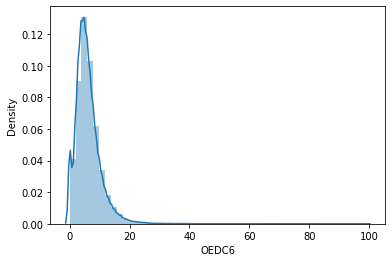

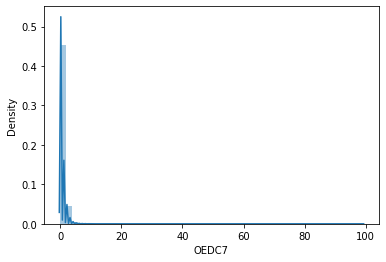

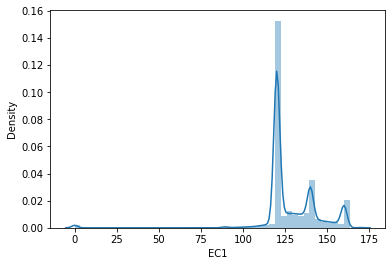

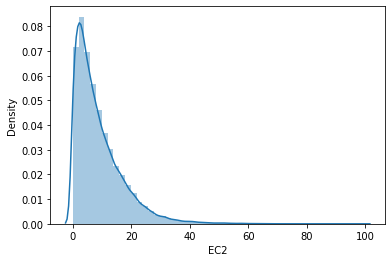

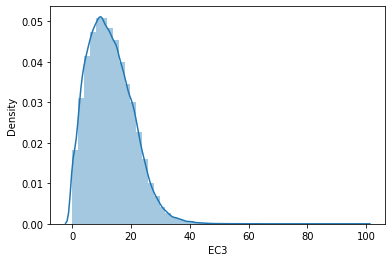

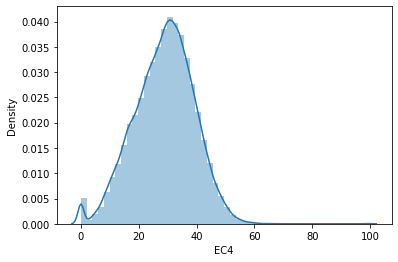

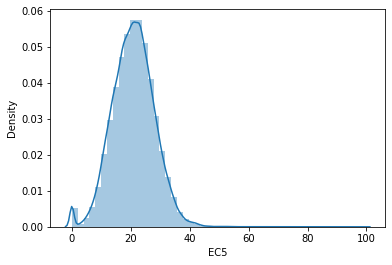

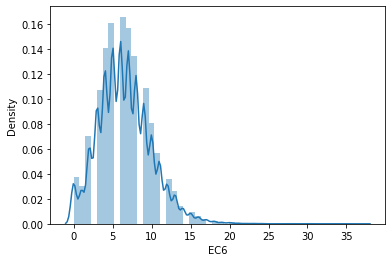

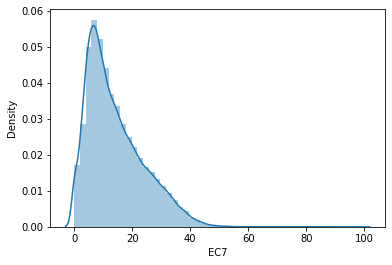

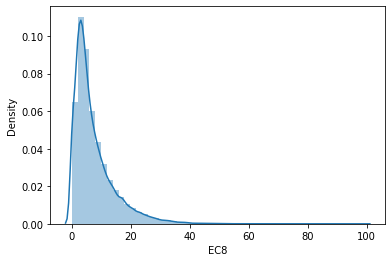

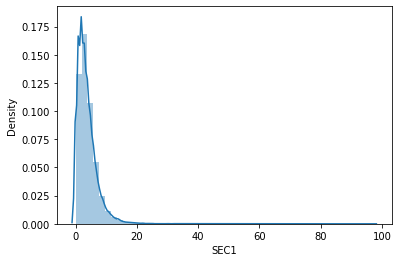

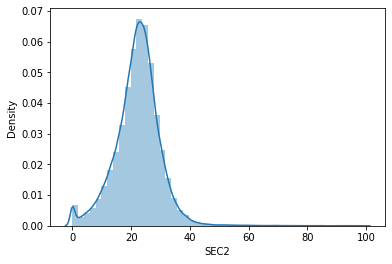

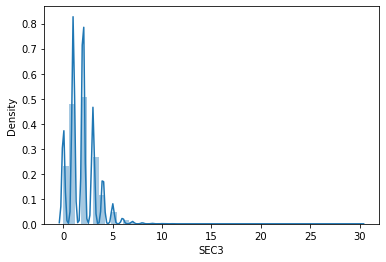

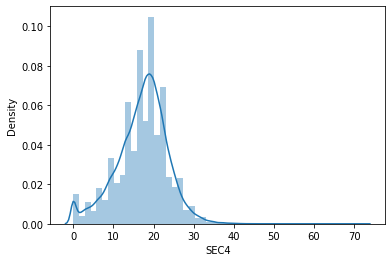

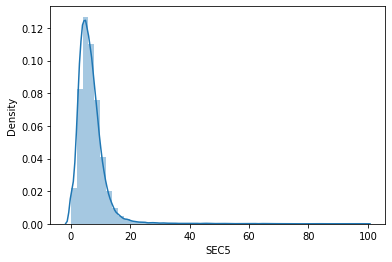

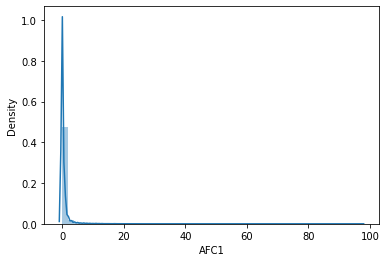

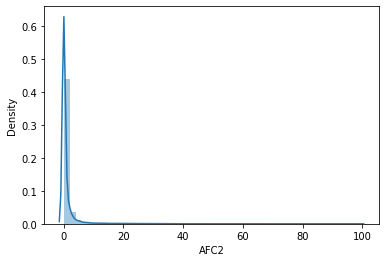

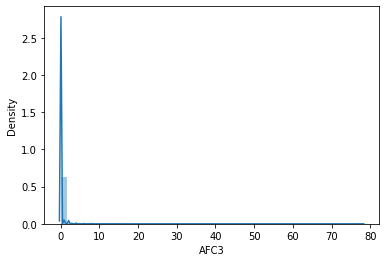

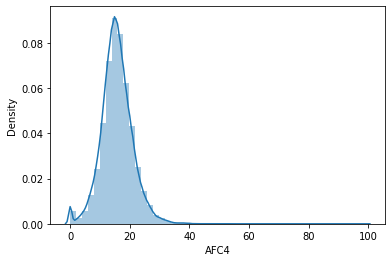

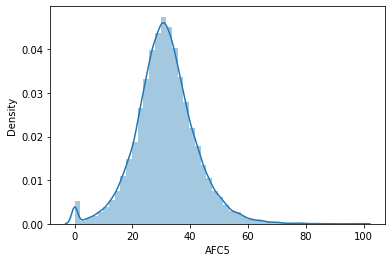

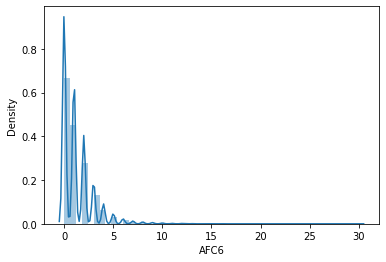

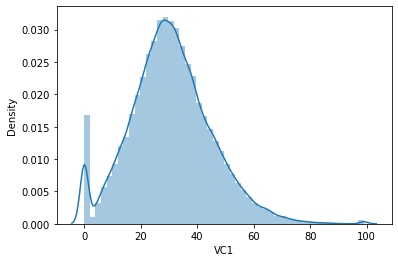

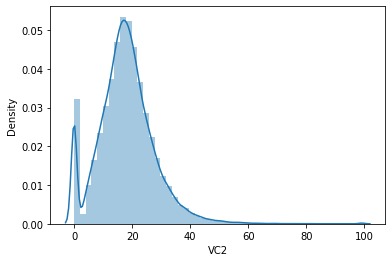

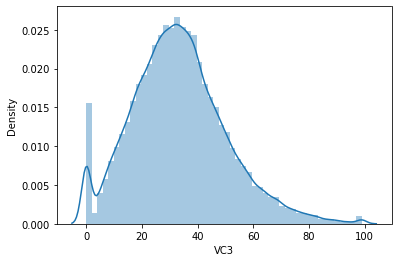

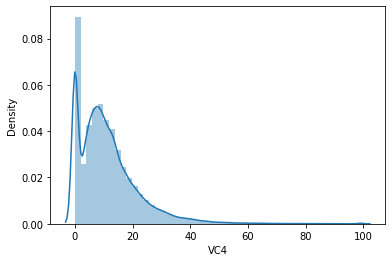

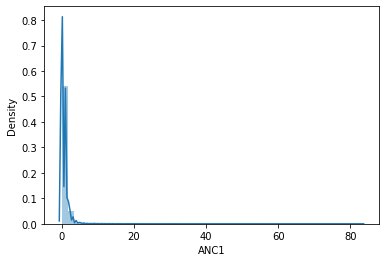

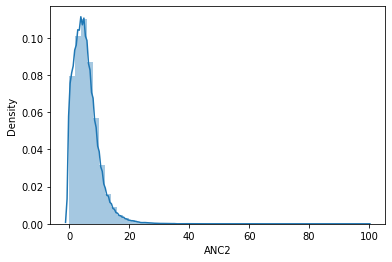

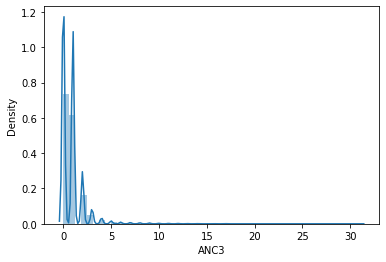

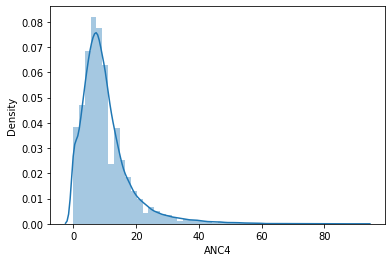

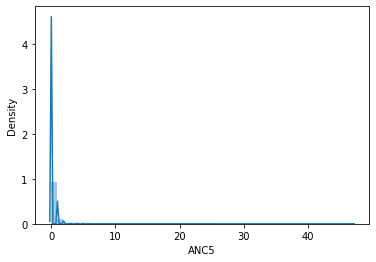

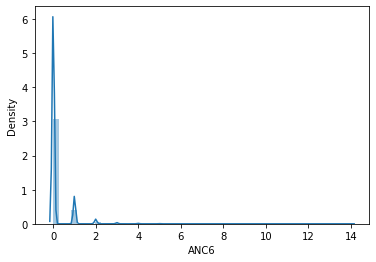

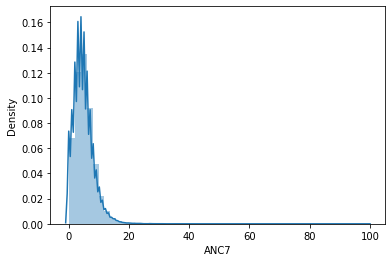

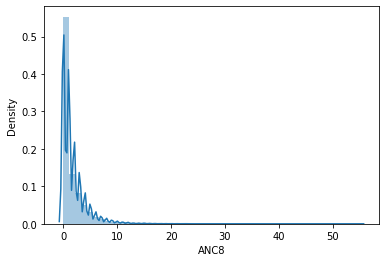

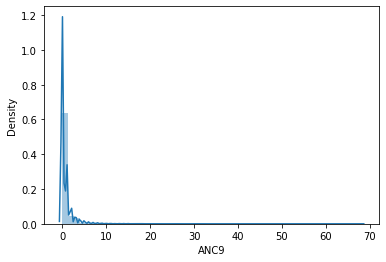

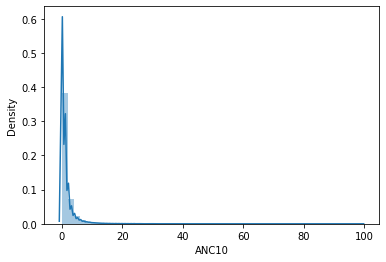

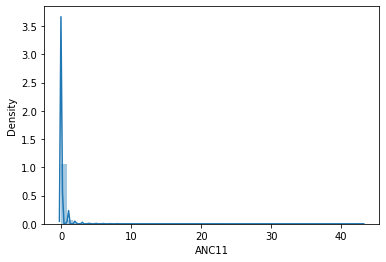

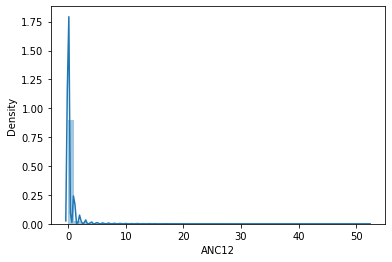

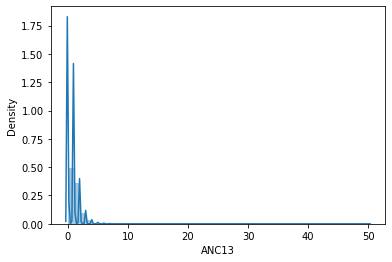

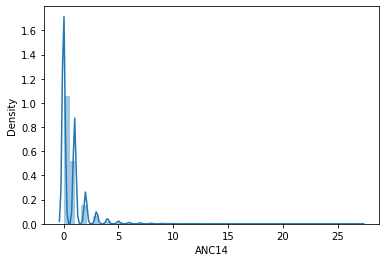

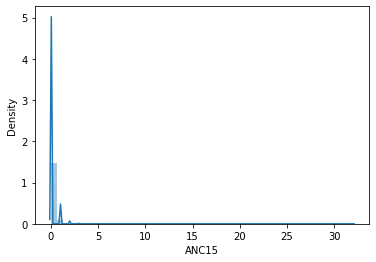

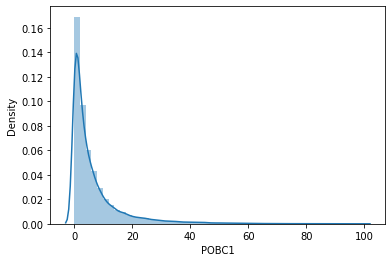

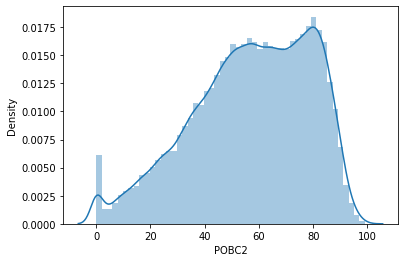

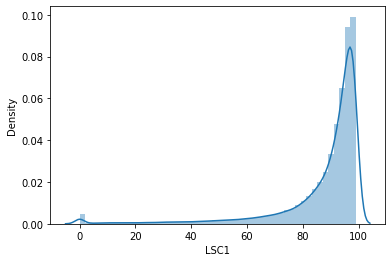

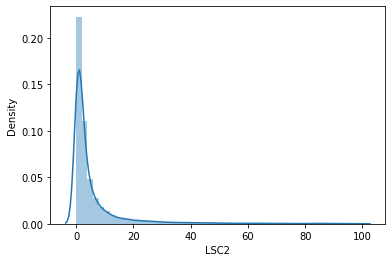

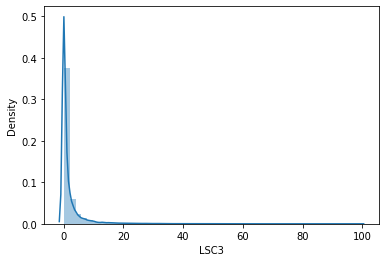

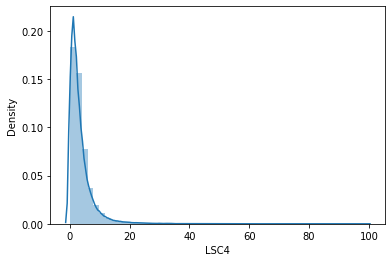

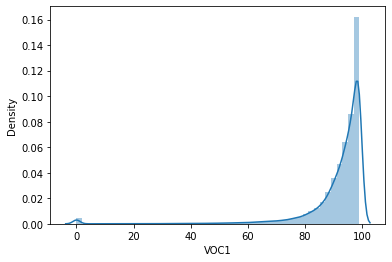

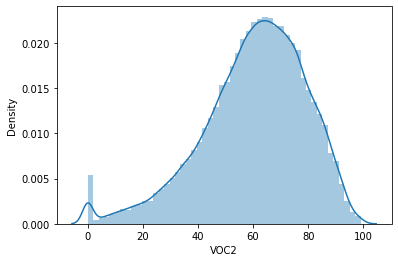

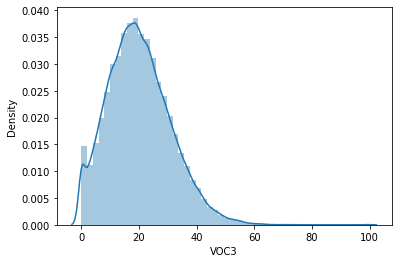

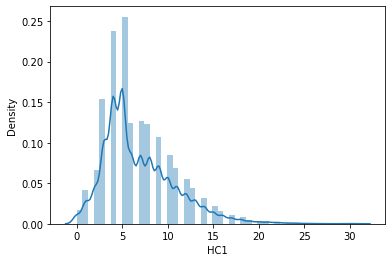

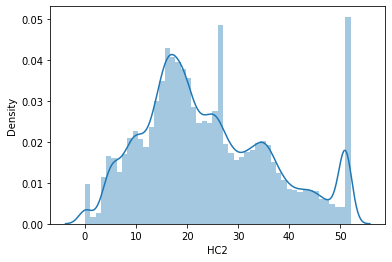

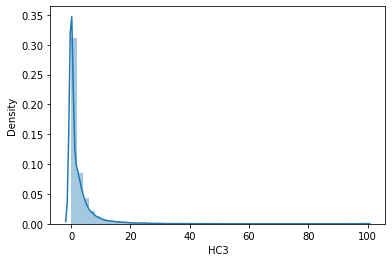

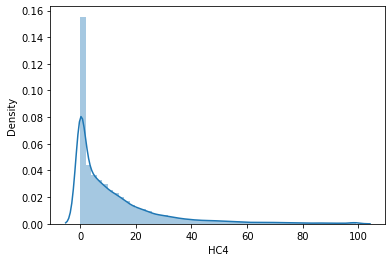

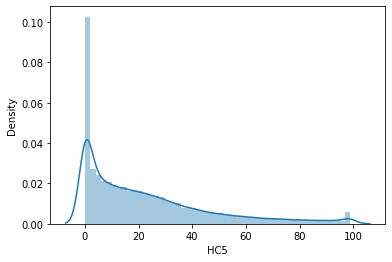

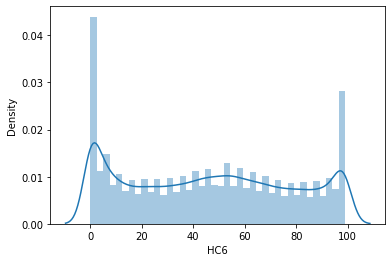

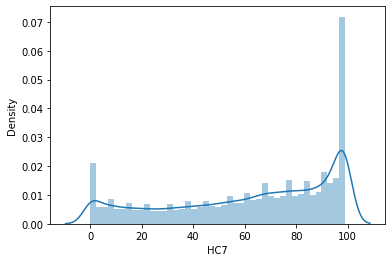

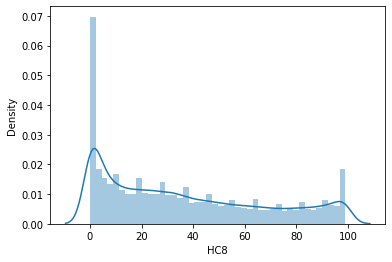

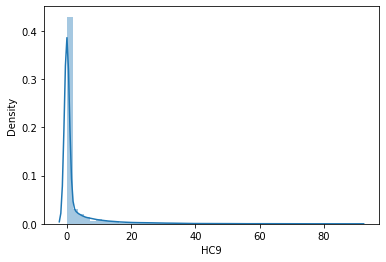

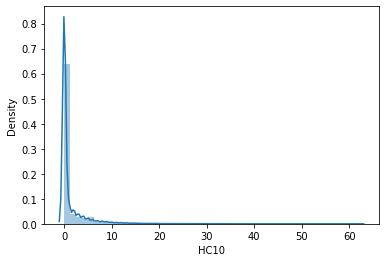

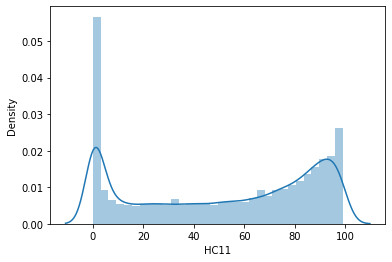

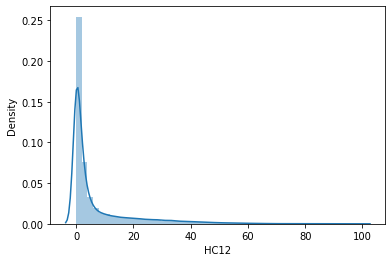

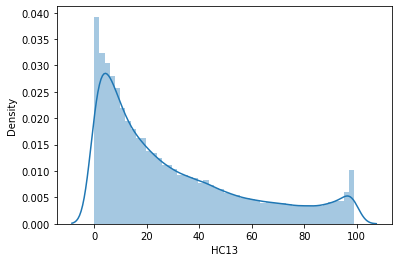

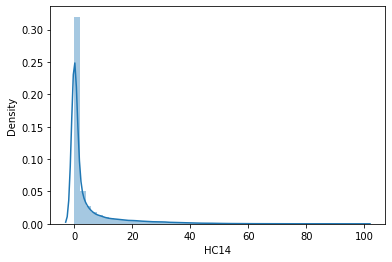

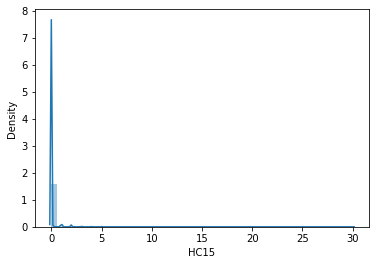

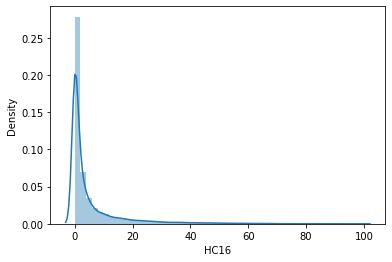

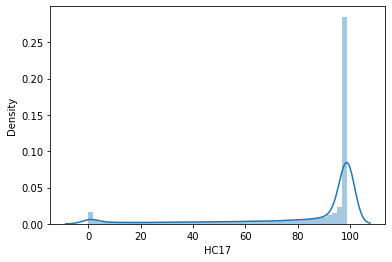

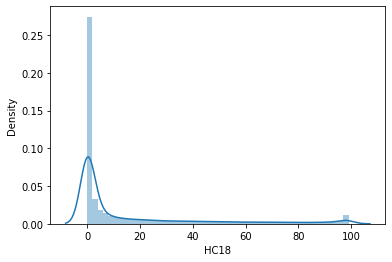

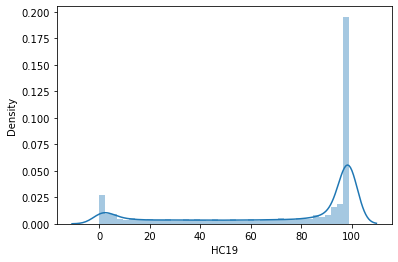

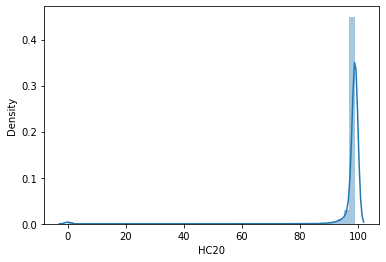

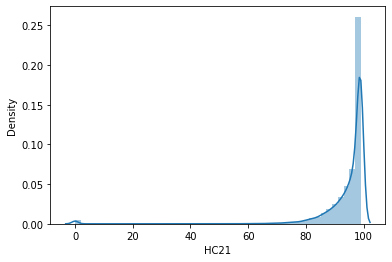

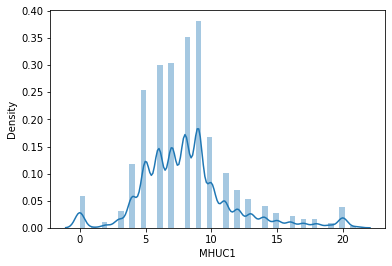

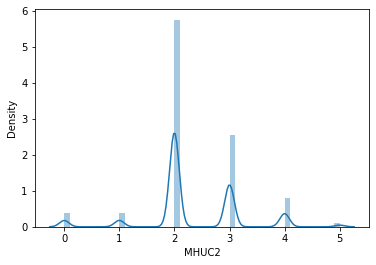

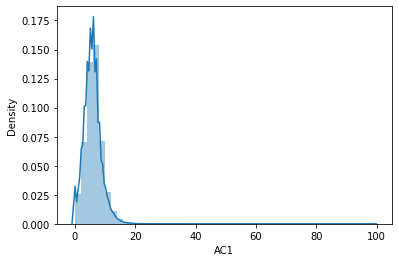

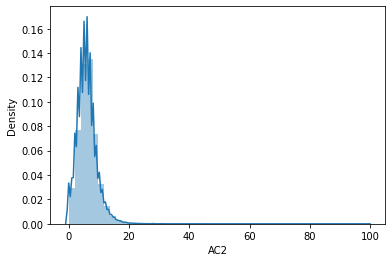

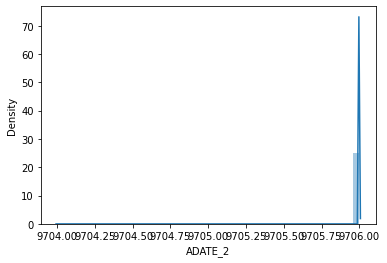

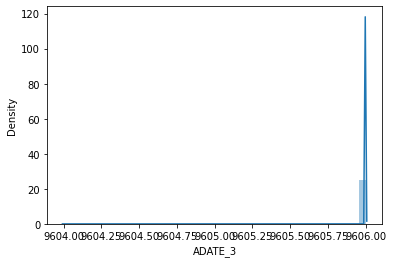

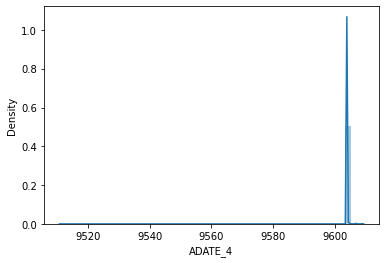

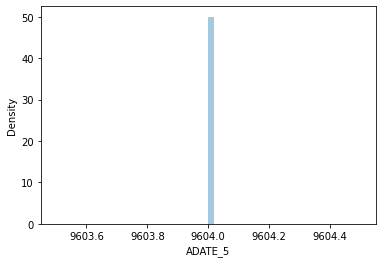

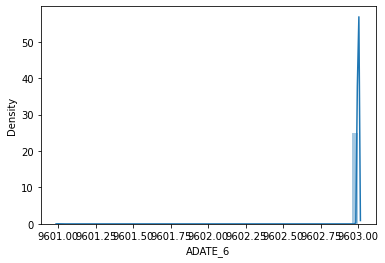

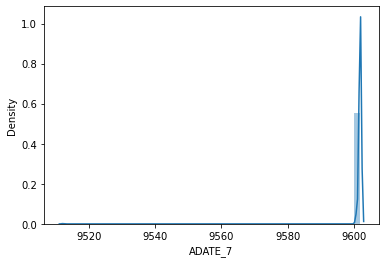

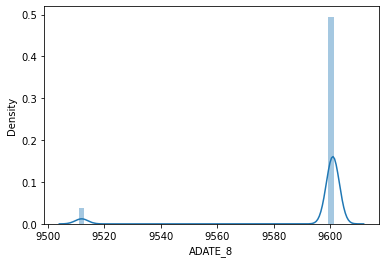

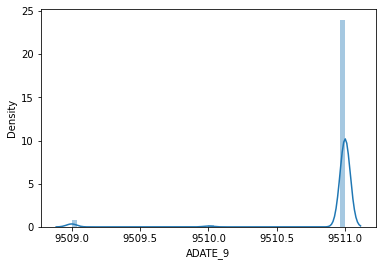

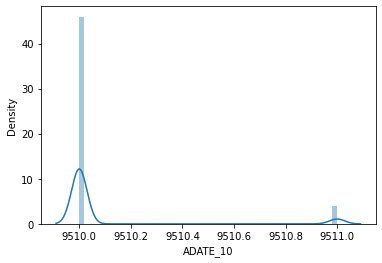

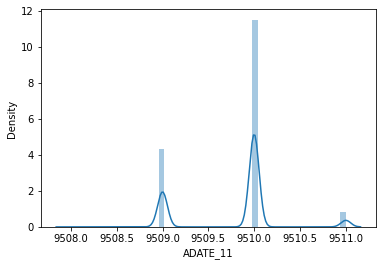

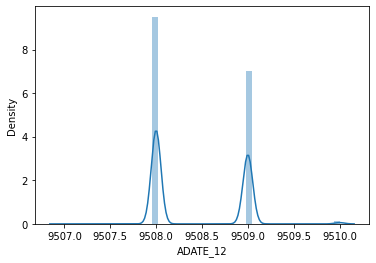

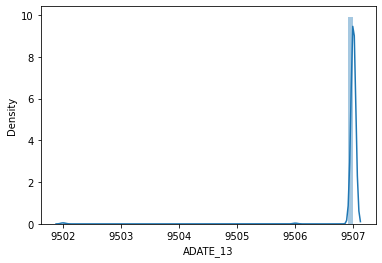

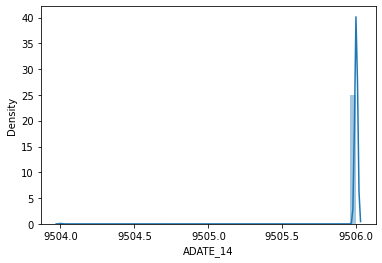

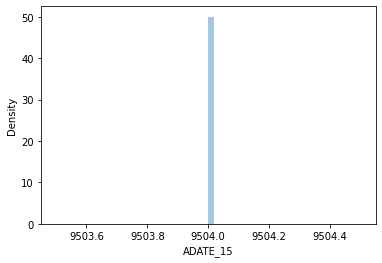

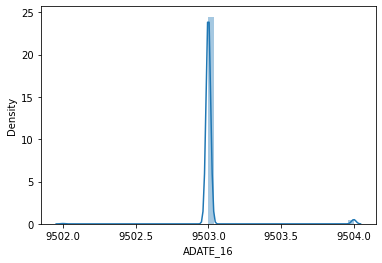

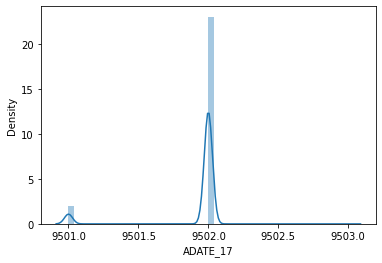

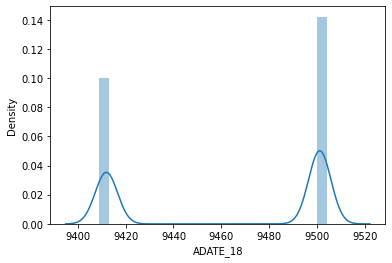

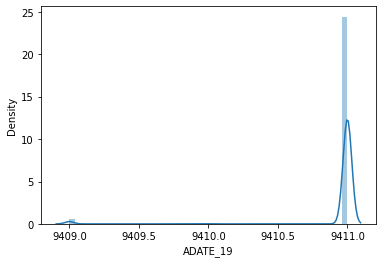

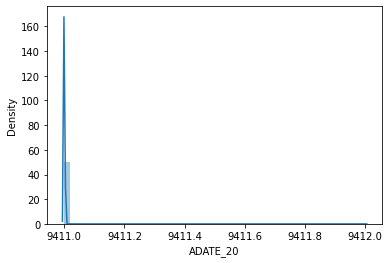

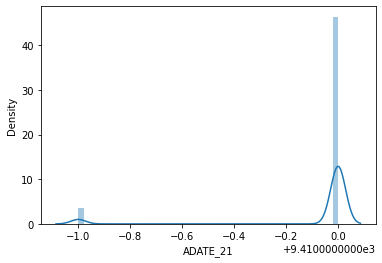

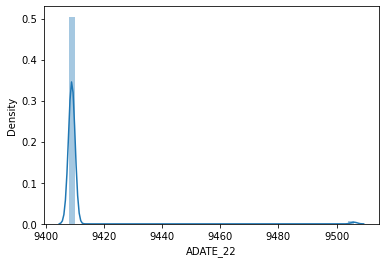

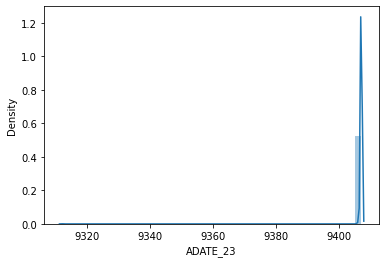

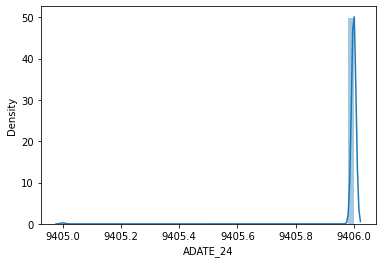

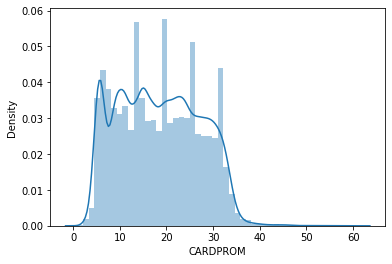

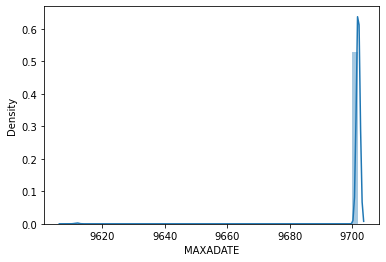

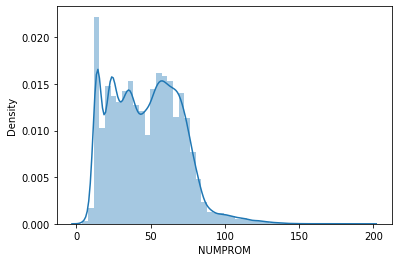

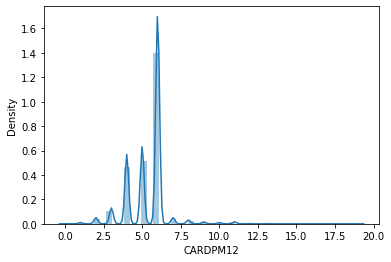

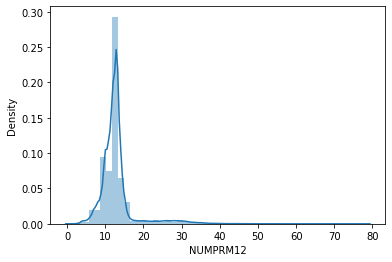

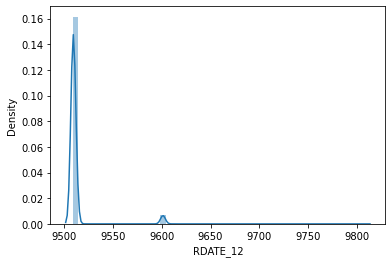

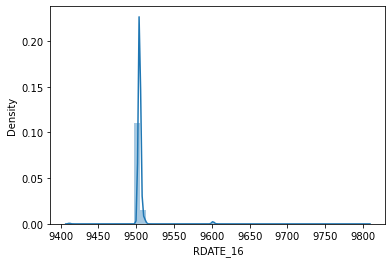

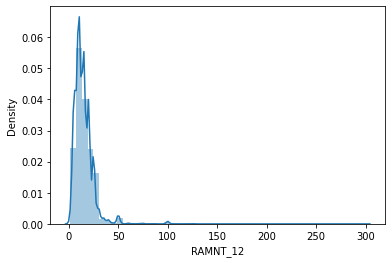

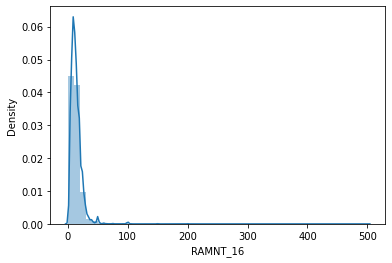

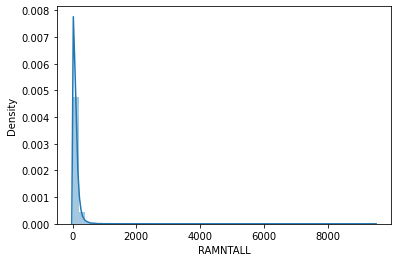

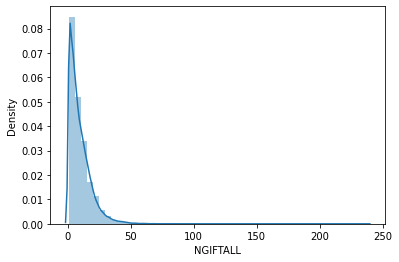

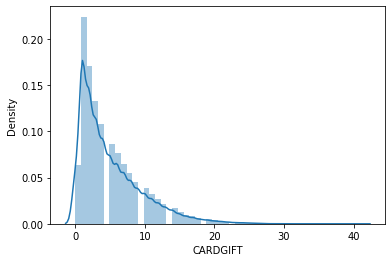

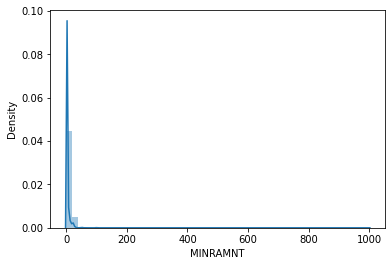

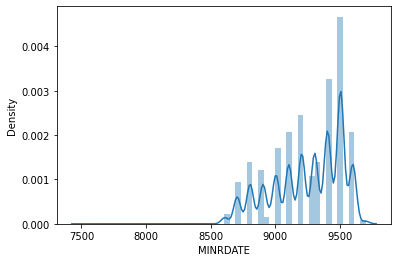

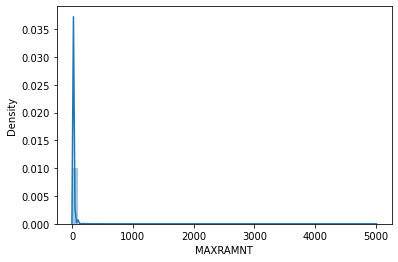

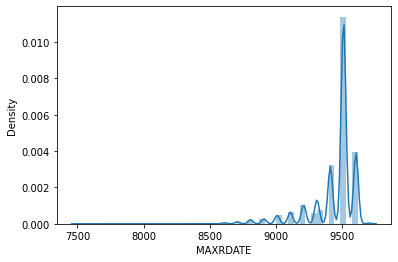

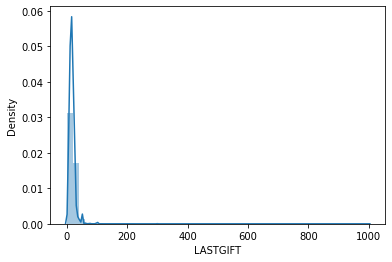

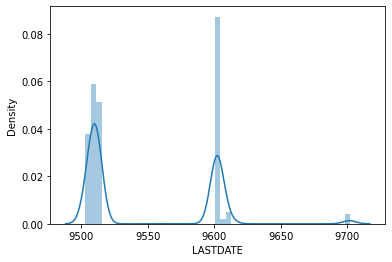

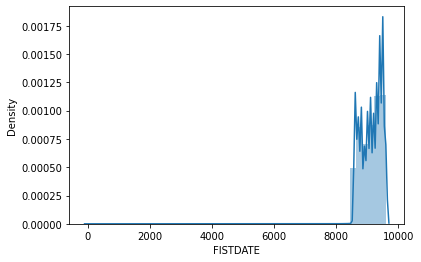

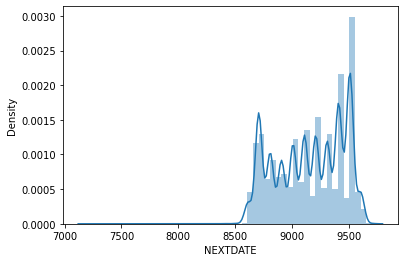

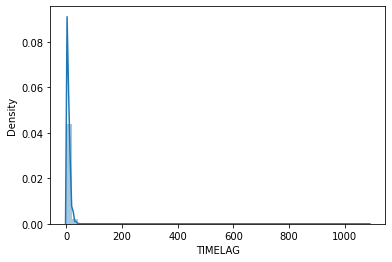

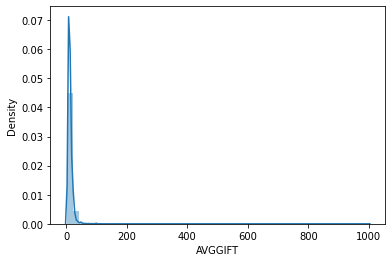

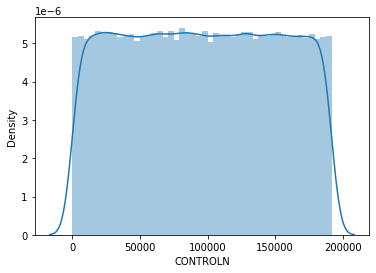

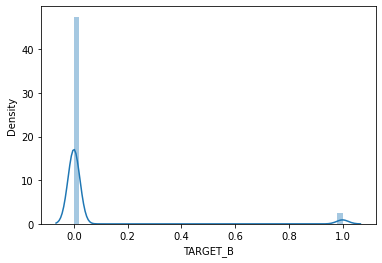

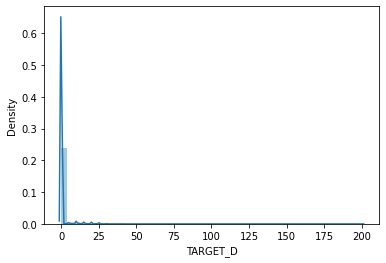

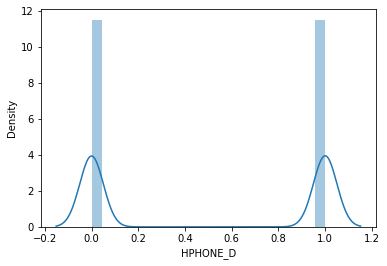

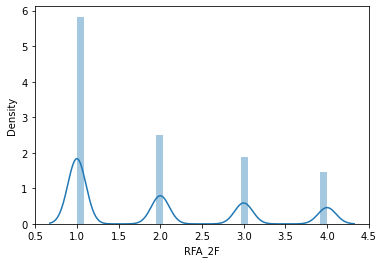

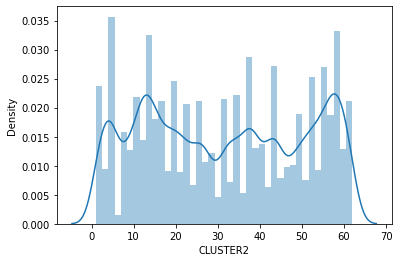

In [16]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

### Checking correlations

In [ ]:
mask = np.zeros_like(numerical.corr())

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

In [ ]:
vif_numerical = add_constant(numerical)
vif_numerical

In [ ]:
vif = pd.DataFrame(index=vif_numerical.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numerical), i),2)
                     for i in range(len(vif_numerical.columns))]

In [ ]:
vif.sort_values("VIF Factor")

## BoxCox

In [ ]:
def boxcox_transform(numerical):
    numeric_cols = numerical[[]].columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        numerical[column] = np.where(numerical[column]<=0, np.NAN, numerical[column]) 
        numerical[column] = numerical[column].fillna(numerical[column].mean())
        transformed_data, ci = stats.boxcox(numerical[column])
        numerical[column] = transformed_data
        _ci[column] = [ci] 
    return numerical, _ci

In [ ]:
numerical, _ci = boxcox_transform(numerical)

## Getting rid of outliers

In [ ]:
def remove_outliers(numerical, threshold=1.5, in_columns=numerical.columns, skip_columns=[]):
    for column in in_columns:
        upper = np.quantile(numerical[column],0.75)
        lower = np.quantile(numerical[column],0.25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        numerical = numerical[(numerical[column]>lower_limit) & (numerical[column]<upper_limit)]
    return numerical

In [ ]:
numerical = remove_outliers(numerical, threshold=1.5, in_columns=numerical.columns, skip_columns=[])